In [3]:
from transformers    import RobertaForSequenceClassification

#New:
#roberta-large-mnli, roberta-large
model_name = "roberta-large"
model_name = "roberta-large-mnli"

RobertaForSequenceClassification.from_pretrained(
            model_name,
            num_labels = 2,
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )

RuntimeError: Error(s) in loading state_dict for RobertaForSequenceClassification:
	size mismatch for classifier.out_proj.weight: copying a param with shape torch.Size([3, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
	size mismatch for classifier.out_proj.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([2]).

# BERT workflow:

In [1]:
#main method, only logic assembly:
# import argparse
# import configparser

# sys.path.insert(0, './code/')
# sys.path.insert(0, './config/')


# from tqdm import tqdm
import os
import torch
import sys
sys.path.insert(0, '../utils/BERT/')


from data_preparation import *
from model_logic      import *
from tokenization     import *

from torch.optim      import Adam
from tqdm             import tqdm_notebook as tqdm


Using TensorFlow backend.


Loaded data_preparation module!
Loaded model_logic module!
Loaded tokenization module!


In [4]:
eval("2+3")
type(eval("[2, 3, 4]")[1])

int

In [5]:
!cat ../config/BERT/RoBERTa/RoBERTa_Hate_set0

[Misc]
FREEZE         = False
SAVE_LOGITS    = True
# Considered random seeds:
RANDOM_SEED = [1, 16, 601, 11, 20]

[Paths]
#../data/EmoNet/Emonet.tsv
EMONET_PATH    =
#../data/Hate/hatespeech-twitter.csv
HATE_PATH      =
#../data/optimism-twitter-data/processed/optimism_set0_train.csv
OPT1M1_PATH    =
OPT_PATH       =../../data/optimism-twitter-data/processed/
#../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv
SENT_PATH      =
HISTORIES_PATH = ./histories/BERT/survey/RoBERTa
DATA_STORE     = ../data/pck_objects/


[Training]
BATCH_SIZE   = 32
PRE_TRAINING = True
SETTING_1M1  = False
MODEL_NAME   = roberta-base
NUM_EPOCHS   = 3



# MODEL_NAME = ['albert-base-v2'\
#               , 'bert-base-uncased', 'bert-large-uncased'\
#               , 'roberta-base', 'xlnet-base-cased',  ]


In [16]:
import configparser

config_path = "../config/BERT/RoBERTa/RoBERTa_Hate_set0"
config      = configparser.ConfigParser()
config.read(config_path)

FREEZE         = config.getboolean("Misc", "FREEZE")
# SAVE_LOGITS    = config.getboolean("Misc", "SAVE_LOGITS")
# Considered random seeds:
RANDOM_SEED    = eval(config.get('Misc', 'RANDOM_SEED'))#[1, 16, 601, 11, 20]

#../data/EmoNet/Emonet.tsv
EMONET_PATH    = "../" + config.get('Paths', 'EMONET_PATH')
#../data/Hate/hatespeech-twitter.csv
HATE_PATH      = "../" + config.get('Paths', 'HATE_PATH')
#../data/optimism-twitter-data/processed/optimism_set0_train.csv
OPT1M1_PATH    = "../" + config.get('Paths', 'OPT1M1_PATH')
OPT_PATH       = "../" + config.get('Paths', 'OPT_PATH')
#../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv
SENT_PATH      = "../" + config.get('Paths', 'SENT_PATH')
HISTORIES_PATH = "../" + config.get('Paths', 'HISTORIES_PATH')
DATA_STORE     = "../" + config.get('Paths', 'DATA_STORE')

BATCH_SIZE   = config.getint('Training', 'BATCH_SIZE')
PRE_TRAINING = config.getboolean('Training', 'PRE_TRAINING')
SETTING_1M1  = config.getboolean('Training', 'SETTING_1M1')
MODEL_NAME   = config.get('Training', 'MODEL_NAME')#roberta-base
NUM_EPOCHS   = config.getint('Training', 'NUM_EPOCHS')

In [9]:
RANDOM_SEED, len(RANDOM_SEED)

([1, 16, 601, 11, 20], 5)

In [11]:
HATE_PATH, config.get('Paths', 'HATE_PATH')

('../', '')

In [17]:
"EmoNet"      if config.get('Paths', 'EMONET_PATH') \
else "Hate"   if config.get('Paths', 'HATE_PATH')   \
else "Opt1M1" if config.get('Paths', 'OPT1M1_PATH') \
else "Sent"   if config.get('Paths', 'SENT_PATH')   \
else "None"

'None'

In [4]:


BATCH_SIZE = 32

GPU_AVAILABLE = torch.cuda.is_available()
EMONET_PATH = None#"../../data/EmoNet/Emonet.tsv"#None
HATE_PATH   = "../../data/Hate/hatespeech-twitter.csv"#None
OPT_PATH    = "../../data/optimism-twitter-data/processed/"#/optimism_set0_train.csv"
SENT_PATH   = None
OPT1M1_PATH= None#"../data/optimism-twitter-data/processed/optimism_set0_train.csv"

# PRE_TRAINING_NAME = "EmoNet"  if EMONET_PATH \
#                 else "Hate"   if HATE_PATH   \
#                 else "Sent"   if SENT_PATH   \
#                 else None
# PRE_TRAINING = True
PRE_TRAINING = False

PRE_TRAINING_NAME = "Opt1M1" if (PRE_TRAINING and not(PRE_TRAINING_NAME)) else PRE_TRAINING_NAME

PRE_TRAINING_NAME = "EmoNet"  if EMONET_PATH \
                else "Hate"   if HATE_PATH   \
                else "Opt1M1" if OPT1M1_PATH \
                else "Sent"   if SENT_PATH   \
                else None


SETTING_1M1  = True
SETTING_1M1  = False
# MODEL_NAME = ['albert-base-v2'\
#               , 'bert-base-uncased', 'bert-large-uncased'\
#               , 'roberta-base', 'xlnet-base-cased',  ]
# MODEL_NAME = 'albert-base-v2'
MODEL_NAME = 'roberta-base'

# Best for each model; and 1 for each pre-training dataset.
NUM_EPOCHS = 3
# FREEZE = True
FREEZE = False
HISTORIES_PATH = "."
SAVE_LOGITS    = True

DATA_STORE = "../../data/pck_objects/"
# Considered random seeds:
# RANDOM_SEED = [1, 16, 601, 11, 20]
RANDOM_SEED = [1]

random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed_all(1)

PRE_TRAINING_NAME = "EmoNet"  if EMONET_PATH \
                else "Hate"   if HATE_PATH   \
                else "Opt1M1" if OPT1M1_PATH \
                else "Sent"   if SENT_PATH   \
                else None
if PRE_TRAINING:
    print(f'Pre-training on {PRE_TRAINING_NAME}.')
else:
    print("No pre-training.")
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('PyTorch:    No GPU available, using the CPU instead.')
    device = torch.device("cpu")


tokenizer = pick_tokenizer(model_name=MODEL_NAME)

#################################################################
#############PRE-Training data-loading procedure:################
#################################################################
if PRE_TRAINING:
    #Read Pre-training data:
    sentences_pre, labels_pre = read_pre_training(emo_path=EMONET_PATH   \
                                              , hate_path=HATE_PATH  \
                                              , opt1M1_path=OPT1M1_PATH \
                                              , sent_path=SENT_PATH)
    #Train/test/val split:
    (sentences_pre_train, labels_pre_train\
    , sentences_pre_test, labels_pre_test\
    , sentences_pre_val, labels_pre_val) = train_test_val_split(sentences_pre, labels_pre)
    #Check if inputs they were generated before
    data_store = DATA_STORE
    if os.path.isfile(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_tokenizer"):
        print(f"Loading {PRE_TRAINING_NAME} tokenizations from {data_store}...")
        tokenizer                 = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_tokenizer")
        input_ids_pre_train       = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_input_ids_train")
        attention_masks_pre_train = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_attention_masks_train")
        input_ids_pre_test        = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_input_ids_test")
        attention_masks_pre_test  = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_attention_masks_test")
        input_ids_pre_val         = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_input_ids_val")
        attention_masks_pre_val   = torch.load(data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_attention_masks_val")
#         print(input_ids_pre_train.shape, attention_masks_pre_train.shape, labels_pre_train.shape)
#         print(input_ids_pre_test.shape, attention_masks_pre_test.shape, labels_pre_test.shape)
#         print(input_ids_pre_val.shape, attention_masks_pre_val.shape, labels_pre_val.shape)
    else:
        #Fit the tokenizer and save the obtained tokenizations:
        print(f"Tokenizing pre-training {PRE_TRAINING_NAME} data.")
        #Train encodings:
        input_ids_pre_train, attention_masks_pre_train   = retrieve_data_encodings(sentences=sentences_pre_train\
                                                                       , tokenizer=tokenizer)
        #Test encodings:
        input_ids_pre_test, attention_masks_pre_test = retrieve_data_encodings(sentences=sentences_pre_test\
                                                                           , tokenizer=tokenizer)
        #Validation encodings:
        input_ids_pre_val, attention_masks_pre_val   = retrieve_data_encodings(sentences=sentences_pre_val\
                                                                           , tokenizer=tokenizer)

        #Save tokenizations
        print(f"Saving {PRE_TRAINING_NAME} tokenizations at {data_store}...")
        torch.save(tokenizer, data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_tokenizer")
        torch.save(input_ids_pre_train      , data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_input_ids_train")
        torch.save(attention_masks_pre_train, data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_attention_masks_train")
        torch.save(input_ids_pre_test       , data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_input_ids_test")
        torch.save(attention_masks_pre_test , data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_attention_masks_test")
        torch.save(input_ids_pre_val        , data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_input_ids_val")
        torch.save(attention_masks_pre_val  , data_store + f"{MODEL_NAME}_{PRE_TRAINING_NAME}_attention_masks_val")



##########################
#############3
##########################
#Same data loading procedure when there is no pretraining:
(sentences_train, labels_train\
        , sentences_test, labels_test\
        , sentences_val, labels_val) = load_opt_data(opt_df_path=OPT_PATH\
                                                     , setting_1M1=SETTING_1M1)



print("\nTokenizing Optimism data:")
input_ids_train, attention_masks_train = retrieve_data_encodings(sentences=sentences_train\
                                                                   , tokenizer=tokenizer)
input_ids_test, attention_masks_test = retrieve_data_encodings(sentences=sentences_test\
                                                                   , tokenizer=tokenizer)
input_ids_val, attention_masks_val = retrieve_data_encodings(sentences=sentences_val\
                                                                   , tokenizer=tokenizer)
print("Generated Optimism data inputs/encodings.")


print(f"Preparing datasets in batches of size {BATCH_SIZE}.")

if PRE_TRAINING:
    print("Pre-training data inputs/encodings generated.")
    dataloader_pre_train, dataloader_pre_test, dataloader_pre_validation = retrieve_dataloaders(\
                   input_ids_pre_train, attention_masks_pre_train, labels_pre_train \
                 , input_ids_pre_test, attention_masks_pre_test, labels_pre_test  \
                 , input_ids_pre_val, attention_masks_pre_val, labels_pre_val     \
                 , batch_size=128)
dataloader_train, dataloader_test, dataloader_validation = retrieve_dataloaders(\
                   input_ids_train, attention_masks_train, labels_train \
                 , input_ids_test, attention_masks_test, labels_test  \
                 , input_ids_val, attention_masks_val, labels_val     \
                 , batch_size=BATCH_SIZE)

print("\nDataLoaders prepared!")

print("Loading model...")
if PRE_TRAINING:
    num_labels = np.unique(labels_pre_train).shape[0]
else:
    num_labels = np.unique(labels_train).shape[0]


model = pick_model(model_name=MODEL_NAME\
                   , num_labels=num_labels)


#define optimizer:
optimizer = Adam(model.parameters()\
                , lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                )


print(f"Model: {MODEL_NAME} has {model.num_parameters():,} parameters;")
# for p in params[-2:]:
if FREEZE:
    for p in list(model.parameters())[:-4]:
        p.requires_grad = False
    print(f"Freezed model: {MODEL_NAME}\'s hidden layers weights;")
else:
    for p in model.parameters():
        p.requires_grad = True
    print(f"Model: {MODEL_NAME} ready for fine-tunning.")


# train_model(model, optimizer\
#             , batch_size=BATCH_SIZE, dataloader_train=dataloader_train     \
#             , dataloader_test=dataloader_test, dataloader_val=dataloader_validation  \
#             , num_epochs=1, random_seed=16\
#             , model_name=MODEL_NAME, weight_decay=False)



if PRE_TRAINING:
    print("\n##############################")
    print(f"### Pre-training on {PRE_TRAINING_NAME}:")
    print("##############################")
    print("\nStarting pre-training procedure on %s..." %PRE_TRAINING_NAME)
    model, df_stats_pre = train_model(model, optimizer\
                    , batch_size=128\
                      #batch_size Should be 128
                    , dataloader_train=dataloader_pre_train     \
                    , dataloader_test=dataloader_pre_test\
                      , dataloader_val=dataloader_pre_validation  \
                    , num_epochs=1\
                      , random_seed=16\
                , model_name=MODEL_NAME\
                  , pre_training_name=PRE_TRAINING_NAME\
                , pre_training=True  \
                , histories_path="." \
                , weight_decay=False)

    model_save_path = f"../../models/{MODEL_NAME}_pre-trained_{PRE_TRAINING_NAME}"
    print("\nPre-training on %s procedure finished!" %PRE_TRAINING_NAME)
    #Change here the final layer depending on the model:
    model = change_model_top_layer(model, MODEL_NAME)
    if torch.cuda.is_available():
        model.cuda()
    torch.save(model.state_dict(), model_save_path)

else:
    print("\nNo pretraining was performed!")
    model_save_path = f"../../models/{MODEL_NAME}_untrained"
    torch.save(model.state_dict(), f"../../models/{MODEL_NAME}_untrained")

###########################3
####TRAINING on OPT#########
############################

for i, rs in enumerate(RANDOM_SEED):
    iteration_name=f"{i+1}of{len(RANDOM_SEED)}"
    #reload model to initial values:
    print("##############################")
    print(f"### Run {iteration_name}, using random seed {rs}:")
    print("##############################")

    setting_name = "set1M1" if SETTING_1M1 else "set0"
    model.load_state_dict(torch.load(model_save_path))

    model, df_stats = train_model(model=model\
                , optimizer=optimizer\
                , batch_size=BATCH_SIZE\
                , dataloader_train=dataloader_train     \
                , dataloader_test=dataloader_test\
                  , dataloader_val=dataloader_validation  \
                , num_epochs=NUM_EPOCHS\
                , random_seed=rs\
                , model_name=MODEL_NAME\
                  , pre_training_name=PRE_TRAINING_NAME\
                , pre_training=False  \
                , histories_path="." \
                , iteration=iteration_name \
                , weight_decay=False
                    , setting=setting_name)

    opt_df_train = pd.read_csv(OPT_PATH + f"optimism_{setting_name}_train.csv")
    opt_df_test  = pd.read_csv(OPT_PATH + f"optimism_{setting_name}_test.csv")
    opt_df_val   = pd.read_csv(OPT_PATH + f"optimism_{setting_name}_validation.csv")

    print("Saving logits:")
    logits_df_train   = retrieve_logits(model        = model            \
                    , opt_df     = opt_df_train     \
                    , dataloader = dataloader_train \
                    , input_ids  = input_ids_train  \
                    , sentences  = sentences_train  \
                    , labels     = labels_train     \
                    , model_name = MODEL_NAME\
                    , batch_size = BATCH_SIZE\
                    , opt_data_path=OPT_PATH\
                    , pre_training_name=PRE_TRAINING_NAME \
                    , iteration=iteration_name
                   , data_type="train"
                    , setting=setting_name)

    logits_df_test   = retrieve_logits(model        = model            \
                , opt_df     = opt_df_test     \
                , dataloader = dataloader_test \
                , input_ids  = input_ids_test  \
                , sentences  = sentences_test  \
                , labels     = labels_test     \
                , model_name = MODEL_NAME\
                , batch_size = BATCH_SIZE\
                , opt_data_path=OPT_PATH\
                , pre_training_name=PRE_TRAINING_NAME\
                , iteration=iteration_name
                  , data_type="test"
                    , setting=setting_name)

    logits_df_val   = retrieve_logits(model        = model            \
            , opt_df     = opt_df_val     \
            , dataloader = dataloader_validation \
            , input_ids  = input_ids_val  \
            , sentences  = sentences_val  \
            , labels     = labels_val     \
            , model_name = MODEL_NAME\
            , batch_size = BATCH_SIZE\
            , opt_data_path=OPT_PATH\
            , pre_training_name=PRE_TRAINING_NAME\
            , iteration=iteration_name
                 , data_type="val"
                    , setting=setting_name)


No pre-training.
There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


  4%|▎         | 216/5939 [00:00<00:02, 2148.47it/s]

Loaded roberta-base tokenizer.
Loaded Optimism data.

Tokenizing Optimism data:


100%|██████████| 768/768 [00:00<00:00, 2933.37it/s]


Generated Optimism data inputs/encodings.
Preparing datasets in batches of size 32.
Dataloaders lengths are: Train: 186, Test: 24, Val.: 24.


DataLoaders prepared!
Loading model...
Loaded roberta-base model.
Model: roberta-base has 125,237,762 parameters;
Model: roberta-base ready for fine-tunning.

No pretraining was performed!
##############################
### Run 1of1, using random seed 1:
##############################


1it [00:00,  6.67it/s]


======== Epoch 1 / 3 ========
Training...


186it [00:25,  7.24it/s]



  Average training Accuracy roberta-base: 0.7624
  Average training loss roberta-base: 0.48
  Training epoch took: 0:00:26

Running Validation...
  Validation Accuracy roberta-base: 0.8216
  Validation Loss roberta-base: 0.42
  Validation took: 0:00:01

Running Test...


1it [00:00,  7.26it/s]

  Test Accuracy roberta-base: 0.8307
  Test Loss roberta-base: 0.43
  Test took: 0:00:01

======== Epoch 2 / 3 ========
Training...


186it [00:25,  7.23it/s]



  Average training Accuracy roberta-base: 0.8664
  Average training loss roberta-base: 0.33
  Training epoch took: 0:00:26

Running Validation...
  Validation Accuracy roberta-base: 0.8281
  Validation Loss roberta-base: 0.41
  Validation took: 0:00:01

Running Test...


1it [00:00,  7.29it/s]

  Test Accuracy roberta-base: 0.8307
  Test Loss roberta-base: 0.42
  Test took: 0:00:01

======== Epoch 3 / 3 ========
Training...


186it [00:25,  7.27it/s]



  Average training Accuracy roberta-base: 0.9103
  Average training loss roberta-base: 0.24
  Training epoch took: 0:00:26

Running Validation...
  Validation Accuracy roberta-base: 0.8242
  Validation Loss roberta-base: 0.50
  Validation took: 0:00:01

Running Test...
  Test Accuracy roberta-base: 0.8307
  Test Loss roberta-base: 0.50
  Test took: 0:00:01

Training complete!
Total training took 0:01:22 (h:mm:ss)

Training stats saved at: .OPT_Hate_roberta-base_set0_it:1of1_ValAcc:0.82421875.csv.
Saving logits:

 Accuracy of model roberta-base on train: 0.9624
 Loss: 0.11
 Computation took: 0:01:23

 Accuracy of model roberta-base on test: 0.8307
 Loss: 0.50
 Computation took: 0:00:02

 Accuracy of model roberta-base on val: 0.8242
 Loss: 0.50
 Computation took: 0:00:02


In [4]:
torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

device(type='cuda')

In [8]:
MODEL_NAME = ['albert-base-v2'\
              , 'bert-base-uncased', 'bert-large-uncased'\
              , 'roberta-base', 'xlnet-base-cased',  ]
# MODEL_NAME = 'albert-base-v2'
# final_layer_names = classifier, 
# pick_model(MODEL_NAME[0], 8) #albert -> classifier
# pick_model(MODEL_NAME[1], 8)   #bert -> classifier 
pick_model(MODEL_NAME[3], 8)   #Roberta -> out_proj 
# pick_model(MODEL_NAME[4], 8)   #XLNet -> logits_proj 

Loaded roberta-base model.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

In [ ]:
def change_model_top_layer(model, model_name):
    """
        Change models' top layer based on its architecture.
        Returns the model with only 2 output units.
    """
    if model_name='albert-base-v2':
        model.classifier = torch.nn.Linear(in_features=768\
                                        , out_features=2)
    if model_name='bert-base-uncased':
        model.classifier = torch.nn.Linear(in_features=768\
                                        , out_features=2)
    if model_name='bert-large-uncased':
        model.classifier = torch.nn.Linear(in_features=1024\
                                        , out_features=2)
    if model_name="roberta-base":
        model.out_proj = torch.nn.Linear(in_features=768\
                                      , out_features=2)
    if model_name="xlnet-base-cased":
        model.logits_proj = torch.nn.Linear(in_features=768\
                                         , out_features=2)
    return model

In [5]:
OPT_PATH + "optimism_set0_train.csv"

'../../data/optimism-twitter-data/processed/optimism_set0_train.csv'

In [6]:
pd.read_csv(opt + "optimism_set0_train.csv")

,Unnamed: 0,Tweet,Username,AverageAnnotation,Original ID
0,220,@runge_kelly rest is good!! if you like tea an...,TheAnglophiler,1.25,220
1,916,dr. budiani-saberi is a medical anthropologist...,JessiKersi,0.00,916
2,321,i want city to win. chelsea going up too far w...,Ajinkyaworld,1.50,321
3,2127,you're annoying the piss out of me,TehhKota,-1.80,2127
4,5643,@arapahoe_basin looking good for tomorrow's sk...,tomfricke,0.60,5643
...,...,...,...,...,...
5934,3531,@tgirlinterruptd @serynada person appreciates ...,WillJaxx,1.00,3531
5935,5884,@coryrocker are you excited though?,rdelvillano,0.60,5884
5936,1045,@urfavelatina is responsible for @lorealparisu...,JAsports70,-0.80,1045
5937,4333,man.. we were the best.,x_VintageBesos,1.00,4333


# All needed methods, placed in utils:

In [5]:
from tqdm import tqdm
import torch

GPU_AVAILABLE = torch.cuda.is_available()

# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('PyTorch:    No GPU available, using the CPU instead.')
    device = torch.device("cpu")

PyTorch:    No GPU available, using the CPU instead.


In [45]:
opt_df_train          = pd.read_csv("../../data/optimism-twitter-data/processed/optimism_set0_train.csv")
opt_df_train          = pd.read_csv("../../data/optimism-twitter-data/processed/optimism_set1M1_train.csv")
opt_train_tweets      = opt_df_train.Tweet.values#np.array(opt_df_train["Tweet"])
# opt_train_gold_labels = np.array(opt_df_train["AverageAnnotation"])

opt_train_tweets
opt_df_train.AverageAnnotation.values[-1]#["AverageAnn"]

-1.2

In [9]:
opt_df_train[np.logical_or(opt_df_train.AverageAnnotation<=-1, opt_df_train.AverageAnnotation>=1)]#.shape
opt_df_train[np.logical_or(opt_df_train.AverageAnnotation<=-1, opt_df_train.AverageAnnotation>=1)].shape

(3074, 5)

In [6]:
def binarize_opt_labels(gold_labels, max_negative_value=0):
    '''
        Binarize labels with respect to max_negative_value threshold.
    '''
    return torch.tensor(np.where(gold_labels<=0, 0, 1).astype(int))

binarize_opt_labels(opt_df_train.AverageAnnotation.values), \
binarize_opt_labels(opt_df_train.AverageAnnotation.values).shape

NameError: name 'opt_df_train' is not defined

In [14]:
import numpy  as np
import pandas as pd

EMONET_PATH = None
HATE_PATH   = "../../data/Hate/hatespeech-twitter.csv"#None
OPT_PATH    = None#"../../data/optimism-twitter-data/processed/optimism_set0_train.csv"
SENT_PATH   = None

PRE_TRAINING_NAME = "EmoNet"  if EMONET_PATH \
                else "Hate"   if HATE_PATH   \
                else "Opt1M1" if OPT_PATH    \
                else "Sent"   if SENT_PATH   \
                else None

def read_pre_training(emo_path=None, hate_path=None, opt1M1_path=None, sent_path=None):
    """
        Read pretraing data, if available.
        Returns: 
            sentences -> np. array of objects;
            labesl    -> np. array of ints.
    """
    if emo_path:
        emonet_df = pd.read_table(emo_path\
                              , names=["Tweet", "Emotion"])
        emonet_df["ELabel"] = emonet_df.Emotion.astype('category').cat.codes
        sentences = emonet_df.Tweet.values
        labels    = torch.tensor(emonet_df.ELabel.values.astype(int))
        print("Pre-Training on EmoNet, data ready.")
    if hate_path:
        hate_df     = pd.read_csv(hate_path\
                      , names=["ID", "Tweet", "Label"])
        hate_df["HLabel"] = hate_df.Label.astype('category').cat.codes
        sentences         = hate_df.Tweet.values
        labels            = torch.tensor(hate_df.HLabel.values.astype(int))
        print("Pre-Training on Hate, data ready.")
    if opt1M1_path:
        opt_df_train          = pd.read_csv(opt1M1_path)
        opt_df_train          = opt_df_train[np.logical_or(opt_df_train.AverageAnnotation<=-1\
                                                     , opt_df_train.AverageAnnotation>=1)]
        sentences = opt_df_train.Tweet.values
        labels    = binarize_opt_labels(opt_df_train.AverageAnnotation.values)
        print("Pre-Training on Optimism 1/-1, data ready.")
        
    if sent_path:
        sent_df   = pd.read_csv(sent_path\
                                , error_bad_lines=False) 
        sentences = sent_df.SentimentText.values
        labels    = torch.tensor(sent_df.Sentiment.values.astype(int))
        print("Pre-Training on Sentiment, data ready.")
    return sentences, labels

# mock_sentences, mock_labels = read_pre_training("../../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"\
#                                                 , sent=True)
sentences_pre, labels_pre = read_pre_training(emo_path=EMONET_PATH   \
                                              , hate_path=HATE_PATH  \
                                              , opt1M1_path=OPT_PATH \
                                              , sent_path=SENT_PATH)

labels_pre#, mock_labels

Pre-Training on Hate, data ready.


tensor([0, 2, 0,  ..., 0, 0, 0])

In [16]:
#Read train test split data:

In [21]:
np.random.shuffle(mock_sentences)
mock_sentences

array(["on the other side of all of what you're going through.is the fulfillment of the promises god's made to you!you'll need energy to get there!",
       '@benrobinson09 @samswinn i spent my night making starters and desserts for a bunch of cunts',
       "@broflamingo // there's a cutoff where it's no longer loli and its just..uh...pedo crap. right?",
       ...,
       "during college i'm so motivated then i get home and i'm like nahhh tv shows",
       'we have to win',
       "i'm done with shopping for the rest of the year. maybe for the rest of my life. i hate shopping. it's the most annoying thing in the world."],
      dtype=object)

In [15]:
# TRAIN_SIZE = .8
# TEST_SIZE  = .1
# VAL_SIZE   = .1

# BATCH_SIZE = 32


# SETTING_1M1 = True
# SETTING_1M1 = False

# setting_name = "set1M1" if SETTING_1M1 else "set0"

def train_test_val_split(sentences, labels\
                         , train_size=.8, test_size=.1\
                         , r_seed=16):
    """
        Split sentences and labels into train test val.
        val_size is considered as 1-train_size-test_size.
        
        Returns:
            (sentences_train, labels_train
            , sentences_test, labels_test
            , sentences_val, labels_val)
    """
    np.random.seed(r_seed)
    indices = np.arange(len(sentences))
    np.random.shuffle(indices)
    
    #Shuffle sentences & labels:
    sentences = sentences[indices]
    labels    = labels[indices]
    
    #Split data
    num_training_samples = int(train_size * len(sentences))
    num_test_samples     = int(test_size  * len(sentences))
    
    sentences_train = sentences[:num_training_samples]
    labels_train    = labels[:num_training_samples]
    
    sentences_test  = sentences[num_training_samples:num_training_samples+num_test_samples]
    labels_test     = labels[num_training_samples:num_training_samples+num_test_samples]
        
    sentences_val   = sentences[num_training_samples+num_test_samples:]
    labels_val      = labels[num_training_samples+num_test_samples:]
    
    print("Splitted pre-training data.")
    
    print("Train shapes:", sentences_train.shape, labels_train.shape)
    print("Test shapes:", sentences_test.shape, labels_test.shape)
    print("Validation shapes:", sentences_val.shape, labels_val.shape)
    
    return (sentences_train, labels_train\
            , sentences_test, labels_test\
            , sentences_val, labels_val)
    

    
def load_opt_data(opt_df_path, setting_1M1=False):
    """
        Load prepared/splitted OPT data, from path.
        
        Returns:
            (sentences_train, labels_train
            , sentences_test, labels_test
            , sentences_val, labels_val)
    """
    #opt_data_path = "../../data/optimism-twitter-data/processed/"
    setting_name = "set1M1" if setting_1M1 else "set0"
    opt_df_train = pd.read_csv(opt_df_path + f"optimism_{setting_name}_train.csv")
    opt_df_test  = pd.read_csv(opt_df_path + f"optimism_{setting_name}_test.csv")
    opt_df_val   = pd.read_csv(opt_df_path + f"optimism_{setting_name}_validation.csv")

    sentences_train = opt_df_train.Tweet.values
    labels_train    = binarize_opt_labels(opt_df_train.AverageAnnotation.values)
    
    sentences_test  = opt_df_test.Tweet.values
    labels_test     = binarize_opt_labels(opt_df_test.AverageAnnotation.values)

    sentences_val   = opt_df_val.Tweet.values
    labels_val      = binarize_opt_labels(opt_df_val.AverageAnnotation.values)
    
    print("Loaded Optimism data.")
    
    return (sentences_train, labels_train\
        , sentences_test, labels_test\
        , sentences_val, labels_val)
    

PRE_TRAINING = True
# PRE_TRAINING = False
if PRE_TRAINING:
    (sentences_pre_train, labels_pre_train\
    , sentences_pre_test, labels_pre_test\
    , sentences_pre_val, labels_pre_val) = train_test_val_split(sentences_pre, labels_pre)
    
    
(sentences_train, labels_train\
        , sentences_test, labels_test\
        , sentences_val, labels_val) = load_opt_data(opt_df_path="../../data/optimism-twitter-data/processed/"\
                                                     , setting_1M1=True)

Splitted pre-training data.
Train shapes: (47356,) torch.Size([47356])
Test shapes: (5919,) torch.Size([5919])
Validation shapes: (5920,) torch.Size([5920])
Loaded Optimism data.


In [98]:
labels_pre_test.shape, sentences_pre_test.shape

(torch.Size([307]), (307,))

In [16]:
from transformers import AlbertTokenizer, BertTokenizer
# from transformers import DistilBertTokenizer
from transformers import RobertaTokenizer, XLNetTokenizer
# from transformers import RobertaTokenizer
# from transformers import AlbertTokenizer
# # from transformers import ElectraTokenizer
# from transformers import AutoTokenizer

# GPU_AVAILABLE = False
# GPU_AVAILABLE = True
#Considered models
MODEL_NAME = ['albert-base-v2'\
              , 'bert-base-uncased', 'bert-large-uncased'\
              , 'roberta-base', 'xlnet-base-cased',  ]
MODEL_NAME = 'albert-base-v2'

def pick_tokenizer(model_name='albert-base-v2'):
    """
        Return specified tokenizer:
        Available model names:
        ['albert-base-v2'\
          , 'bert-base-uncased', 'bert-large-uncased'\
          , 'roberta-base', 'xlnet-base-cased',  ]
    """
    if model_name == 'albert-base-v2':
        tokenizer = AlbertTokenizer.from_pretrained(model_name, do_lower_case=True)
    if model_name == 'bert-base-uncased':
        tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
    if model_name == 'bert-large-uncased':
        tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
    if model_name == 'roberta-base':
        tokenizer = RobertaTokenizer.from_pretrained(model_name, do_lower_case=True)
    if model_name == 'xlnet-base-cased':
        tokenizer = XLNetTokenizer.from_pretrained(model_name, do_lower_case=True)
    
    print(f'Loaded {model_name} tokenizer.')
    return tokenizer
        
# Load the BERT tokenizer.
# print('Loading BERT tokenizer...')
# # if torch.cuda.is_available():  
# if GPU_AVAILABLE:
#     tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# #     tokenizer1 = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
#     # tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
#     tokenizer2 = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)
#     # tokenizer = XLNetTokenizer.from_pretrained('xlnet-large-cased', do_lower_case=True)
# #     tokenizer2 = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)
#     # tokenizer = ElectraTokenizer.from_pretrained('google/electra-large-discriminator', do_lower_case=True)
# #     tokenizer = AutoTokenizer.from_pretrained("ssun32/bert_base_nli_turkle")

# else:
#     tokenizer1 = AlbertTokenizer.from_pretrained('albert-base-v2', do_lower_case=True)
#     tokenizer2 = AlbertTokenizer.from_pretrained('albert-large-v2', do_lower_case=True)
#     print(f"Loaded albert-base-v2 as tokenizer1.")
#     print(f"Loaded albert-large-v2 as tokenizer2.")
    

# GPU_AVAILABLE = True
# mock_tokenizer = pick_tokenizer(model_name="xlnet-base-cased")
tokenizer = pick_tokenizer(model_name='albert-base-v2')

Loaded albert-base-v2 tokenizer.


In [17]:
MAX_LENGTH = 64

def retrieve_data_encodings(sentences, tokenizer, max_len=64):
    """
        Returns input_ids & attentin_masks
        out of list of sentences.
    """
    input_ids       = []
    attention_masks = []

    # For every sentence...
    for sent in tqdm(sentences):
        # `encode_plus` will:
        #   (1) Tokenize the sentence.
        #   (2) Prepend the `[CLS]` token to the start.
        #   (3) Append the `[SEP]` token to the end.
        #   (4) Map tokens to their IDs.
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens.
        # The method`encode` returns only the phrase encoding, 
        # not the masks as well.
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_len,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )
        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])
        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


In [18]:
import pickle
def load_pickle(file_name):
    """
        Return pickled object from location.
    """
    return torch.load(file_name)
#     with open(file_name, "rb") as file:
#         pck_object = pickle.load(file)
#     return pck_object

def save_pickle(obj, file_name):
    """
        Save obj as pickle to location.
    """
    torch.save(obj, file_name)
#     with open(file_name, "wb") as file:
#         pickle.dump(obj, file)

In [20]:
import os



if PRE_TRAINING:
    #Check if inputs they were generated before
        
    data_store = "../../data/pck_objects/"
    if os.path.isfile(data_store + f"{PRE_TRAINING_NAME}_tokenizer"):
        print(f"Loading {PRE_TRAINING_NAME} tokenizations from {data_store}...")
        tokenizer                 = torch.load(data_store + f"{PRE_TRAINING_NAME}_tokenizer")
        input_ids_pre_train       = torch.load(data_store + f"{PRE_TRAINING_NAME}_input_ids_train")
        attention_masks_pre_train = torch.load(data_store + f"{PRE_TRAINING_NAME}_attention_masks_train")
        input_ids_pre_test        = torch.load(data_store + f"{PRE_TRAINING_NAME}_input_ids_test")
        attention_masks_pre_test  = torch.load(data_store + f"{PRE_TRAINING_NAME}_attention_masks_test")
        input_ids_pre_val         = torch.load(data_store + f"{PRE_TRAINING_NAME}_input_ids_val")
        attention_masks_pre_val   = torch.load(data_store + f"{PRE_TRAINING_NAME}_attention_masks_val")
        
        print(input_ids_pre_train.shape, attention_masks_pre_train.shape, labels_pre_train.shape)
        print(input_ids_pre_test.shape, attention_masks_pre_test.shape, labels_pre_test.shape)
        print(input_ids_pre_val.shape, attention_masks_pre_val.shape, labels_pre_val.shape)
    else:
        #Fit the tokenizer and save the obtained tokenizations:
        print(f"Tokenizing pre-training {PRE_TRAINING_NAME} data.")
        #Train encodings:
        input_ids_pre_train, attention_masks_pre_train   = retrieve_data_encodings(sentences=sentences_pre_train\
                                                                       , tokenizer=tokenizer)
        #Test encodings:
        input_ids_pre_test, attention_masks_pre_test = retrieve_data_encodings(sentences=sentences_pre_test\
                                                                           , tokenizer=tokenizer)
        #Validation encodings:
        input_ids_pre_val, attention_masks_pre_val   = retrieve_data_encodings(sentences=sentences_pre_val\
                                                                           , tokenizer=tokenizer)
        
        #Save tokenizations
        print(f"Saving {PRE_TRAINING_NAME} tokenizations at {data_store}...")
        torch.save(tokenizer, data_store + f"{PRE_TRAINING_NAME}_tokenizer")
        torch.save(input_ids_pre_train      , data_store + f"{PRE_TRAINING_NAME}_input_ids_train")
        torch.save(attention_masks_pre_train, data_store + f"{PRE_TRAINING_NAME}_attention_masks_train")
        torch.save(input_ids_pre_test       , data_store + f"{PRE_TRAINING_NAME}_input_ids_test")
        torch.save(attention_masks_pre_test , data_store + f"{PRE_TRAINING_NAME}_attention_masks_test")
        torch.save(input_ids_pre_val        , data_store + f"{PRE_TRAINING_NAME}_input_ids_val")
        torch.save(attention_masks_pre_val  , data_store + f"{PRE_TRAINING_NAME}_attention_masks_val")
    
    print("Pre-training data inputs/encodings generated.")
    

print("\nTokenizing ")
input_ids_train, attention_masks_train = retrieve_data_encodings(sentences=sentences_train\
                                                                   , tokenizer=tokenizer)
input_ids_test, attention_masks_test = retrieve_data_encodings(sentences=sentences_test\
                                                                   , tokenizer=tokenizer)
input_ids_val, attention_masks_val = retrieve_data_encodings(sentences=sentences_val\
                                                                   , tokenizer=tokenizer)
print("Generated Optimism data inputs/encodings.")


  0%|          | 196/47356 [00:00<00:24, 1956.20it/s]

Tokenizing pre-training Hate data.


100%|██████████| 5920/5920 [00:03<00:00, 1866.85it/s]


Saving Hate tokenizations at ../../data/pck_objects/...


  8%|▊         | 236/3015 [00:00<00:01, 2356.50it/s]

Pre-training data inputs/encodings generated.

Tokenizing 


100%|██████████| 416/416 [00:00<00:00, 2628.45it/s]

Generated Optimism data inputs/encodings.


In [21]:
from torch.utils.data import TensorDataset#, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
# batch_size = 16

if torch.cuda.is_available():
#     batch_size = 256
#     batch_size = 128
#     batch_size = 64
    BATCH_SIZE = 32
else:
    BATCH_SIZE = 4


def retrieve_dataloaders(ids_train, masks_train, labels_train \
                         , ids_test, masks_test, labels_test  \
                         , ids_val, masks_val, labels_val     \
                         , batch_size=32):
    """
        Transform lists of inputs into dataloaders.
        Returns:
        dataloader_train, dataloader_test, dataloader_validation
    """
    # Combine the training inputs into a TensorDataset.
    dataset_train    = TensorDataset(ids_train, masks_train, labels_train)
    dataloader_train = DataLoader(
                dataset_train,  # The training samples.
                sampler = RandomSampler(dataset_train), # Select batches randomly
                batch_size = batch_size # Trains with this batch size.
            )
    dataset_test = TensorDataset(ids_test, masks_test, labels_test)
    dataloader_test = DataLoader(
            dataset_test, # The validation samples.
            sampler = SequentialSampler(dataset_test), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
    
    dataset_val = TensorDataset(ids_val, masks_val, labels_val)
    dataloader_validation = DataLoader(
            dataset_val, # The validation samples.
            sampler = SequentialSampler(dataset_val), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
    
    print("Dataloaders lengths are: Train: %d, Test: %d, Val.: %d.\n" \
          %(len(dataloader_train), len(dataloader_test), len(dataloader_validation)))
    return dataloader_train, dataloader_test, dataloader_validation
    
# dataset_train2 = TensorDataset(input_ids_train2, attention_masks_train2, labels_train)

# dataset_test1 = TensorDataset(input_ids_test1, attention_masks_test1, labels_test)
# dataset_test2 = TensorDataset(input_ids_test2, attention_masks_test2, labels_test)

# dataset_dev1 = TensorDataset(input_ids_dev1, attention_masks_dev1, labels_dev)
# dataset_dev2 = TensorDataset(input_ids_dev2, attention_masks_dev2, labels_dev)

# print('{:>5,} training samples'.format(len(dataset_train1)))
# print('{:>5,} validation samples'.format(len(dataset_dev1)))
# print('{:>5,} test samples'.format(len(dataset_test1)))

# dataset_train1.tensors[0][0][:10]




print(f"Preparing datasets in batches of size {BATCH_SIZE}.")
# batch_size = 256    



if PRE_TRAINING:
    dataloader_pre_train, dataloader_pre_test, dataloader_pre_validation = retrieve_dataloaders(\
                   input_ids_pre_train, attention_masks_pre_train, labels_pre_train \
                 , input_ids_pre_test, attention_masks_pre_test, labels_pre_test  \
                 , input_ids_pre_val, attention_masks_pre_val, labels_pre_val     \
                 , batch_size=128)

dataloader_train, dataloader_test, dataloader_validation = retrieve_dataloaders(\
                   input_ids_train, attention_masks_train, labels_train \
                 , input_ids_test, attention_masks_test, labels_test  \
                 , input_ids_val, attention_masks_val, labels_val     \
                 , batch_size=BATCH_SIZE)

print("\nDataLoaders prepared!")



Preparing datasets in batches of size 4.
Dataloaders lengths are: Train: 370, Test: 47, Val.: 47.

Dataloaders lengths are: Train: 754, Test: 104, Val.: 104.


DataLoaders prepared!


In [44]:
(input_ids_train.shape), (input_ids_pre_train.shape)

(torch.Size([3015, 64]), torch.Size([2459, 64]))

In [11]:
#prepare model:

from transformers import AlbertForSequenceClassification, BertForSequenceClassification
from transformers import RobertaForSequenceClassification, XLNetForSequenceClassification

# MODEL_NAME = ['albert-base-v2'\
#               , 'bert-base-uncased', 'bert-large-uncased'\
#               , 'roberta-base', 'xlnet-base-cased',  ]
# MODEL_NAME = 'albert-base-v2'


def pick_model(model_name, num_labels):
    """
        Return specified model:
        Available model names:
        ['albert-base-v2'\
          , 'bert-base-uncased', 'bert-large-uncased'\
          , 'roberta-base', 'xlnet-base-cased',  ]
    """
    if model_name == 'albert-base-v2':   
        model = AlbertForSequenceClassification.from_pretrained(
            model_name, 
            num_labels = num_labels, 
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
    if model_name in ('bert-base-uncased', 'bert-large-uncased'):
        model = BertForSequenceClassification.from_pretrained(
            model_name,
            num_labels = num_labels,
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
    if model_name == 'roberta-base':
        model = RobertaForSequenceClassification.from_pretrained(
            model_name,
            num_labels = num_labels,
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
    if model_name == 'xlnet-base-cased':
        model = XLNetForSequenceClassification.from_pretrained(
            model_name,
            num_labels = num_labels,
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
    
    print(f'Loaded {model_name} model.')
    return model
     
    
if PRE_TRAINING:
    num_labels = np.unique(labels_pre_train).shape[0]
else:
    num_labels = np.unique(labels_train).shape[0]
    

model = pick_model(model_name=MODEL_NAME\
                   , num_labels=num_labels)
model

Loaded albert-base-v2 model.


AlbertForSequenceClassification(
  (albert): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768,

In [12]:
from torch.optim import Adam

#define optimizer:
optimizer = Adam(model.parameters()\
                , lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                )

# FREEZE = True
FREEZE = False

print(f"Model: {MODEL_NAME} has {model.num_parameters():,} parameters;")
# for p in params[-2:]:
if FREEZE:
    for p in list(model.parameters())[:-4]:
        p.requires_grad = False
    print(f"\nFreezed model: {MODEL_NAME}\'s hidden layers weights;")
else:
    for p in model.parameters():
        p.requires_grad = True
    print(f"\nModel: {MODEL_NAME} ready for fine-tunning.")

# Best for each model; and 1 for each pre-training dataset.
NUM_EPOCHS = 1

Model: albert-base-v2 has 11,685,122 parameters;

Model: albert-base-v2 ready for fine-tunning.


In [13]:
import numpy as np
from sklearn.metrics import f1_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels, F1=False):
    if F1:
        return f1_score(preds.argmax(axis=1), labels, average="weighted")
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [14]:
# Considered random seeds:
# RANDOM_SEED = [1, 16, 601, 11, 20]
RANDOM_SEED = 1



In [36]:
#Training loop.

import random
import numpy as np

def train_model(model, optimizer\
                , batch_size, dataloader_train     \
                , dataloader_test, dataloader_val  \
                , num_epochs, random_seed\
                , model_name, pre_training_name=None\
                , pre_training=False  \
                , histories_path="." \
                , weight_decay=False):
    """
        Train the the given `model` using `optimizer`, `batch_size`
        and the provided Dataloaders, for `num_epochs` with `random_seed`.
        model_name:        should be a cosntant (`MODEL_NAME`) 
            in the program (see `pick_model`);
        pre_training_name: if the model was/is on pre-training 
            (`PRE_TRAINING_NAME` constant) ;
        pre_training:      True of False if pre-training data;
        histories_path:    Where to save training stats;
        weight_decay:      optimizer decay weights (untested feature).
        
        Returns: Training stats as pandas DataFrame.
    """
    
    # This training code is based on the `run_glue.py` script here:
    # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
    # and on:
    # https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX
    # Set the seed value all over the place to make this reproducible.
    random.seed(random_seed)
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    
    if weight_decay:
        # Create the learning rate scheduler.
        scheduler = transformers.get_linear_schedule_with_warmup(optimizer, 
                            num_warmup_steps = 0, # Default value in run_glue.py
                            num_training_steps = len(dataloader_train) * num_epochs)

    
    #Criterion:
    cse_loss = torch.nn.CrossEntropyLoss()

    # We'll store a number of quantities such as training and validation loss, 
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()
    
    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    

    # For each epoch...
    for epoch_i in (range(num_epochs)):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, num_epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss     = 0
        total_train_accuracy = 0

        # Put the model into training mode. Don't be mislead--the call to 
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()

        # For each batch of training data...
        for step, batch in tqdm(enumerate(dataloader_train)):
            if not(GPU_AVAILABLE) and step % 120 == 1:
                break
                # Report progress.
 
            # Unpack this training batch from our dataloader. 
            b_input_ids  = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels     = batch[2].to(device)
            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()          
            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
#             loss, logits = model1(b_input_ids, 
#                                  token_type_ids=None, 
#                                  attention_mask=b_input_mask, 
#                                  labels=b_labels)
            logits = model(b_input_ids, 
               token_type_ids=None, 
               attention_mask=b_input_mask)[0]
            loss   = cse_loss(logits, b_labels)
            
            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            total_train_loss += loss.item() * (len(logits)/BATCH_SIZE)

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()
            if weight_decay:
                # Update the learning rate.
                scheduler.step()

            # Move logits and labels to CPU
            logits    = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            total_train_accuracy += flat_accuracy(logits, label_ids, F1=False) * (len(logits)/BATCH_SIZE)


        # Report the final accuracy for this validation run.
        avg_train_accuracy = total_train_accuracy / len(dataloader_train)
        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(dataloader_train)             
        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print(f"  Average training Accuracy {model_name}: {avg_train_accuracy:.4f}")
        print(f"  Average training loss {model_name}: {avg_train_loss:.2f}")
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.


        ###################################################
        #############Validation Stats######################
        ###################################################
        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()
        
        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss     = 0

        # Evaluate data for one epoch
        for batch in dataloader_val:
            b_input_ids  = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels     = batch[2].to(device)
            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        
                logits = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask)[0]
                loss   = cse_loss(logits, b_labels)

            # Accumulate the validation loss.
            total_eval_loss += loss.item() * (len(logits)/BATCH_SIZE)

            # Move logits and labels to CPU
            logits     = logits.detach().cpu().numpy()
            label_ids  = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids, F1=False) * (len(logits)/BATCH_SIZE)

            if not(torch.cuda.is_available()):
                break


        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(dataloader_val)
        print(f"  Validation Accuracy {model_name}: {avg_val_accuracy:.4f}")

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(dataloader_val)
        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print(f"  Validation Loss {model_name}: {avg_val_loss:.2f}")
        print("  Validation took: {:}".format(validation_time))


        ###################################################
        #############Test Stats############################
        ###################################################
        print("")
        print("Running Test...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_test_accuracy = 0
        total_test_loss     = 0
        # Evaluate data for one epoch
        for batch in dataloader_test:       
            b_input_ids  = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels     = batch[2].to(device)
            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        
                logits = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask)[0]
                loss   = cse_loss(logits, b_labels)
            # Accumulate the validation loss.
            total_test_loss += loss.item() * (len(logits)/BATCH_SIZE)
            # Move logits and labels to CPU
            logits    = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_test_accuracy += flat_accuracy(logits, label_ids, F1=False) * (len(logits)/BATCH_SIZE)
            if not(torch.cuda.is_available()):
                break


        # Report the final accuracy for this validation run.
        avg_test_accuracy = total_test_accuracy / len(dataloader_test)
        print(f"  Test Accuracy {model_name}: {avg_test_accuracy:.4f}")
        
        # Calculate the average loss over all of the batches.
        avg_test_loss = total_test_loss / len(dataloader_test)

        # Measure how long the validation run took.
        test_time = format_time(time.time() - t0)

        print(f"  Test Loss {model_name}: {avg_test_loss:.2f}")
        print("  Test took: {:}".format(test_time))


        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                f'Training Loss': avg_train_loss,
                f'Valid. Loss': avg_val_loss,
                f'Test. Loss': avg_test_loss,
                f'Training Accur.': avg_train_accuracy,
                f'Valid. Accur.': avg_val_accuracy,
                f'Test Accur.': avg_test_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time,
                'Test Time': test_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
    
    #############################
    #Saving training stats:
    df_stats  = pd.DataFrame(data=training_stats).set_index('epoch')
    val_acc   = df_stats["Valid. Accur."].values[-1]#.max()
    data_name = pre_training_name + "_" if pre_training \
            else f"OPT_{pre_training_name+'_' if pre_training_name else ''}"
    hist_fn = f"{histories_path}/{data_name}{model_name}_ValAcc:{val_acc}.csv"
    df_stats.to_csv(hist_fn)
    print(f"\nTraining stats saved at: {hist_fn}.")
    
    
    return model, df_stats
    
train_model(model, optimizer\
            , batch_size=BATCH_SIZE, dataloader_train=dataloader_train     \
            , dataloader_test=dataloader_test, dataloader_val=dataloader_validation  \
            , num_epochs=1, random_seed=16\
            , model_name=MODEL_NAME, weight_decay=False)

0it [00:00, ?it/s]


======== Epoch 1 / 1 ========
Training...


1it [00:01,  1.77s/it]



  Average training Accuracy albert-base-v2: 0.0013
  Average training loss albert-base-v2: 0.00
  Training epcoh took: 0:00:02

Running Validation...
  Validation Accuracy albert-base-v2: 0.0072
  Validation Loss albert-base-v2: 0.01
  Validation took: 0:00:01

Running Test...
  Test Accuracy albert-base-v2: 0.0024
  Test Loss albert-base-v2: 0.01
  Test took: 0:00:01

Training complete!
Total training took 0:00:03 (h:mm:ss)
Training stats saved at: ./OPT_albert-base-v2_ValAcc:0.007211538461538462.csv.


In [ ]:
# train_model(model, optimizer\
#             , batch_size=BATCH_SIZE, dataloader_train=dataloader_train     \
#             , dataloader_test=dataloader_test, dataloader_val=dataloader_validation  \
#             , num_epochs=1, random_seed=16\
#             , model_name=MODEL_NAME, weight_decay=False)

HISTORIES_PATH = "."
SAVE_LOGITS    = True

if PRE_TRAINING:
    train_model(model, optimizer\
            , batch_size=1, dataloader_train=dataloader_pre_train     \
            , dataloader_test=dataloader_pre_test, dataloader_val=dataloader_pre_validation  \
            , num_epochs=1, random_seed=16\
            , model_name=MODEL_NAME, weight_decay=False)
    torch.save(model.state_dict(), f"../../models/{MODEL_NAME}_pre-trained_{PRE_TRAINING_NAME}")
else:
    torch.save(model.state_dict(), f"../../models/{MODEL_NAME}_untrained")

#To load back the model:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

retrieve_logits(model        = model            \
                , opt_df     = opt_df_train     \
                , dataloader = dataloader_train \
                , input_ids  = input_ids_train  \
                , sentences  = sentences_train  \
                , labels     = labels_train     \
                , model_name = MODEL_NAME\
                , batch_size = BATCH_SIZE\
                , opt_data_path="."\
                , pre_training_name=PRE_TRAINING_NAME)

In [50]:
# Get predicted logits by model on dataloader:
def retrieve_logits(model, opt_df          \
                    , dataloader, input_ids\
                    , sentences, labels    \
                    , model_name, batch_size  \
                    , opt_data_path, pre_training_name=None):
    '''
        Return data_frame with additional 2 columns according to
        the 2 logits predicted by the model for each entry.
    '''
        
    #Criterion:
    cse_loss = torch.nn.CrossEntropyLoss()   
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    
    # Tracking variables 
    total_accuracy = 0
    total_loss = 0
    nb_steps = 0
    assertion_tweets  = [None for i in labels]
    predicted_logits0 = [None for i in labels]
    predicted_logits1 = [None for i in labels]
    
    t0=time.time()
    # Evaluate data for one epoch
    for batch in dataloader:
        b_input_ids  = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels     = batch[2].to(device)
        with torch.no_grad():        
            logits = model(b_input_ids, 
               token_type_ids=None, 
               attention_mask=b_input_mask)[0]
            loss   = cse_loss(logits, b_labels)
        # Accumulate the validation loss.
        total_loss += loss.item()* (len(label_ids)/batch_size)
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

#         missed_indexes = np.where(label_ids != np.argmax(logits, axis=1).flatten())[0]
#         for mi, missed_index in enumerate(missed_indexes):
#         missed_indexes = np.where(label_ids != np.argmax(logits, axis=1).flatten())[0]
#         for mi, missed_index in enumerate(missed_indexes):
        for i, sample in enumerate(batch[0]):
#             print(batch[0][i])
            original_index = input_ids.tolist().index(batch[0][i].tolist())
            
            assert(sentences[original_index] ==  opt_df.iloc[original_index]["Tweet"])
#             missed_val_tweets["Tweet"].append(sentences[original_index])
#             missed_val_tweets["Predicted Logits"].append(logits[missed_index])
#             predicted_logits.append((original_index\
#                                      , sentences[original_index]\
#                                      , logits[i]))
#             predicted_logits0.append(logits[i][0])
#             predicted_logits1.append(logits[i][1])
#             assertion_tweets.append(sentences[original_index])
            predicted_logits0[original_index] = logits[i][0]
            predicted_logits1[original_index] = logits[i][1]
            assertion_tweets[original_index]  = sentences[original_index]
            
        

    #     break

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_accuracy += flat_accuracy(logits, label_ids) * (len(label_ids)/batch_size)


    # Report the final accuracy for this validation run.
    avg_accuracy = total_accuracy / len(dataloader)
    print("\n Accuracy of model {0}: {1:.4f}".format(model_name, avg_accuracy))

    # Calculate the average loss over all of the batches.
    avg_loss = total_loss / len(dataloader)

    # Measure how long the validation run took.
    computation_time = format_time(time.time() - t0)

    print(" Loss: {0:.2f}".format(avg_loss))
    print(" Computation took: {:}".format(computation_time))

    
    opt_df[model_name+"logit0"] = predicted_logits0
    opt_df[model_name+"logit1"] = predicted_logits1
#     assert(np.where(mock_opt_df["Tweet"] == mock_opt_df["Model1_tweet"])[0].shape[0] == mock_opt_df.shape[0])
    assert(np.all(np.where(opt_df["Tweet"] == assertion_tweets, True, False)))
    
    #Save new dataframe:
    data_name = f"OPT_{pre_training_name+'_' if pre_training_name else ''}"
    save_path = f"{opt_data_path}/Logits_{data_name}{model_name}_Acc:{avg_accuracy}.csv"
    opt_df.to_csv(save_path)
    
    return opt_df

retrieve_logits(model        = model            \
                , opt_df     = opt_df_train     \
                , dataloader = dataloader_train \
                , input_ids  = input_ids_train  \
                , sentences  = sentences_train  \
                , labels     = labels_train     \
                , model_name = MODEL_NAME\
                , batch_size = BATCH_SIZE\
                , opt_data_path="."\
                , pre_training_name=PRE_TRAINING_NAME)


 Accuracy of model albert-base-v2: 0.6491
 Loss: 0.74
 Computation took: 0:06:54


,Unnamed: 0,Tweet,Username,AverageAnnotation,Original ID,albert-base-v2logit0,albert-base-v2logit1
0,220,@runge_kelly rest is good!! if you like tea an...,TheAnglophiler,1.25,220,-0.824011,1.248779
1,321,i want city to win. chelsea going up too far w...,Ajinkyaworld,1.50,321,-0.765283,1.093548
2,2127,you're annoying the piss out of me,TehhKota,-1.80,2127,-0.453276,0.720489
3,5894,xxx . love neil,adorb_zayn,1.20,5894,-0.727588,1.054465
4,6844,and so begins the work to bring about #change ...,Brit_Mathews,1.50,6844,-0.576202,0.898891
...,...,...,...,...,...,...,...
3010,7370,already irritated and on top of that i have to...,victoria_alvaa,-2.25,7370,-0.629735,0.847870
3011,1442,a girl with kaleidoscope eyessss. cellophane f...,caitlinnk_,1.20,1442,-0.775267,1.259777
3012,2003,thanks @museumandrea ! and good luck @_laura_...,mambolica,1.50,2003,-0.728567,1.023334
3013,1869,@jniall68 becose you are. i choose you to save...,PrincessXMalik,1.75,1869,-0.635119,1.006413


In [46]:
opt_df_train.shape, len(dataloader_train)

((3015, 5), 754)

In [37]:
opt_df_train

,Unnamed: 0,Tweet,Username,AverageAnnotation,Original ID
0,220,@runge_kelly rest is good!! if you like tea an...,TheAnglophiler,1.25,220
1,916,dr. budiani-saberi is a medical anthropologist...,JessiKersi,0.00,916
2,321,i want city to win. chelsea going up too far w...,Ajinkyaworld,1.50,321
3,2127,you're annoying the piss out of me,TehhKota,-1.80,2127
4,5643,@arapahoe_basin looking good for tomorrow's sk...,tomfricke,0.60,5643
...,...,...,...,...,...
5934,3531,@tgirlinterruptd @serynada person appreciates ...,WillJaxx,1.00,3531
5935,5884,@coryrocker are you excited though?,rdelvillano,0.60,5884
5936,1045,@urfavelatina is responsible for @lorealparisu...,JAsports70,-0.80,1045
5937,4333,man.. we were the best.,x_VintageBesos,1.00,4333


In [21]:
f"Something_{'' if PRE_TRAINING else ''}"

'Something_'

In [90]:
input_ids_train.shape, attention_masks_train.shape, labels_train.shape

input_ids_pre_train.shape, attention_masks_pre_train.shape, labels_pre_train.shape
input_ids_pre_test.shape, attention_masks_pre_test.shape, labels_pre_test.shape
input_ids_pre_val.shape, attention_masks_pre_val.shape, labels_pre_val.shape

(torch.Size([416, 64]), torch.Size([416, 64]), torch.Size([308]))

In [77]:
TensorDataset(input_ids_train, attention_masks_train, labels_train)

In [64]:

save_pickle(attention_masks_pre_val  , f"{PRE_TRAINING_NAME}_attention_masks_val")

In [55]:
torch.save(tokenizer, data_store + f"{PRE_TRAINING_NAME}_tokenizer.pickle")

In [56]:
torch.load(data_store + f"{PRE_TRAINING_NAME}_tokenizer.pickle")

In [57]:
tokenizer

In [ ]:
import numpy  as np
import pandas as pd

# from data_preparation import *

# opt_data_path = "../../data/optimism-twitter-data/tweets_annotation.csv"
opt_data_path = "../../data/optimism-twitter-data/processed/"

SETTING_1M1 = True
# SETTING_1M1 = False
setting_name = "set1M1" if SETTING_1M1 else "set0"


# def retrieve_logits(
opt_df_train = pd.read_csv(opt_data_path + f"optimism_{setting_name}_train.csv").drop("Unnamed: 0", axis=1)
opt_df_test  = pd.read_csv(opt_data_path + f"optimism_{setting_name}_test.csv").drop("Unnamed: 0", axis=1)
opt_df_dev   = pd.read_csv(opt_data_path + f"optimism_{setting_name}_validation.csv").drop("Unnamed: 0", axis=1)

opt_train_tweets      = np.array(opt_df_train["Tweet"])
opt_train_gold_labels = np.array(opt_df_train["AverageAnnotation"])
opt_test_tweets       = np.array(opt_df_test["Tweet"])
opt_test_gold_labels  = np.array(opt_df_test["AverageAnnotation"])
opt_dev_tweets        = np.array(opt_df_dev["Tweet"])
opt_dev_gold_labels   = np.array(opt_df_dev["AverageAnnotation"])


# opt_tweets, opt_gold_labels = read_OPT_data(data_path=opt_data_path)
# opt_gold_labels             = np.array(opt_gold_labels)
# opt_tweets                  = np.array(opt_tweets)



# SETTING_1M1 = True
# SETTING_1M1 = False

# if SETTING_1M1:
#     opt_tweets, opt_gold_labels = remove_vague_tweets(\
#                                                 opt_tweets\
#                                               , opt_gold_labels)

# bin_opt_gold_labels = binarize_labels(gold_labels=(opt_gold_labels)\
#                                       , max_negative_value=0)

# x_train, y_train, x_dev, y_dev, x_test, y_test = \
#     train_dev_test_split(opt_vectorized_tweets\
#                          , bin_opt_gold_labels, R_SEED=16)

# opt_tweets[-1], opt_gold_labels[-1], bin_opt_gold_labels[-1]

# Get the lists of sentences and their labels.
# sentences = df.sentence.values
# labels    = df.label.values
sentences_train = opt_train_tweets
labels_train    = np.where(opt_train_gold_labels<=0, 0, 1)

sentences_test = opt_test_tweets
labels_test    = np.where(opt_test_gold_labels<=0, 0, 1)

sentences_dev  = opt_dev_tweets
labels_dev     = np.where(opt_dev_gold_labels<=0, 0, 1)

print(f"{labels_train.shape[0]} train samples;")
print(f"{labels_test.shape[0]} test samples;")
print(f"{labels_dev.shape[0]} validation samples.")

In [ ]:

SENTIMENT_PATH = "../../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"
HATE_PATH      = "../../data/Hate/hatespeech-twitter.csv"
EMO_PATH       = "../../data/EmoNet/Emonet.tsv"
# PRE_TRAINING_ON_TSA = True
PRE_TRAINING_ON_TSA = False
SENTIMENT_TEXT      = "SentimentText"
SENTIMENT_LABEL     = "Sentiment"
# PRE_TRAINING_ON_HATE = True
PRE_TRAINING_ON_HATE = False
# PRE_TRAINING_ON_EMO  = True
PRE_TRAINING_ON_EMO  = False

if PRE_TRAINING_ON_HATE:
    hate_df     = pd.read_csv(HATE_PATH\
                              , names=["ID", "Tweet", "Label"])
    hate_df["HLabel"] = hate_df.Label.astype('category').cat.codes

    # Get the lists of sentences and their labels.
    # sentences = df.sentence.values
    # labels    = df.label.values
    sentences = hate_df.Tweet.values
    labels    = hate_df.HLabel.values.astype(int)
#     np.unique(labels).shape[0]
#     hate_df.groupby("Label").count()[["Tweet"]]
#     hate_df.head()
    
if PRE_TRAINING_ON_TSA:
    sent_tweets, sent_gold_labels = read_OPT_data(data_path=SENTIMENT_PATH\
                                       , text_column=SENTIMENT_TEXT\
                                       , label_column=SENTIMENT_LABEL)
    
    sentences = np.array(sent_tweets)
    labels    = np.array(sent_gold_labels)
    
if PRE_TRAINING_ON_EMO:
    emonet_df = pd.read_table("../../data/EmoNet/Emonet.tsv"\
                              , names=["Tweet", "Emotion"])

#     emonet_df.shape

#     emonet_df.head()

    emonet_df["ELabel"] = emonet_df.Emotion.astype('category').cat.codes

    # Get the lists of sentences and their labels.
    # sentences = df.sentence.values
    # labels    = df.label.values
    sentences = emonet_df.Tweet.values
    labels    = emonet_df.ELabel.values.astype(int)

    np.unique(labels).shape[0]
    emonet_df.groupby("Emotion").count()[["Tweet"]]#Plutchik-2 Emotions
    emonet_df.head()
    # emonet_df../
    # emonet_df.cc.
    
labels

# Analyzed missed tweets:

1. Save `.csv` with missed tweets.

Find missed tweets and store into pandas Data Frame.

In [7]:
# Tracking variables 
total_eval_accuracy = 0
total_eval_loss = 0
nb_eval_steps = 0
missed_val_tweets = {\
                     "Original ID" : []\
                     , "Tweet":[]\
                     , "Annotation": []\
                     , "Label": []\
                     , "Predicted Logits": []\
                    }


# Evaluate data for one epoch
for batch in dataloader_validation:
    
    #How to find the position of a list in a list of lists:
    #input_ids[input_ids.tolist().index(batch[0][0].tolist())]
#     break
    
    # Unpack this training batch from our dataloader. 
    #
    # As we unpack the batch, we'll also copy each tensor to the GPU using 
    # the `to` method.
    #
    # `batch` contains three pytorch tensors:
    #   [0]: input ids 
    #   [1]: attention masks
    #   [2]: labels 
    b_input_ids  = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels     = batch[2].to(device)

    # Tell pytorch not to bother with constructing the compute graph during
    # the forward pass, since this is only needed for backprop (training).
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        (loss, logits) = model(b_input_ids, 
                               token_type_ids=None, 
                               attention_mask=b_input_mask,
                               labels=b_labels)

    
    
    # Accumulate the validation loss.
    total_eval_loss += loss.item()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    
#     print(logits)
#     print(np.argmax(logits, axis=1).flatten())
#     print(label_ids)
#     print(label_ids != np.argmax(logits, axis=1).flatten())
    
#     print(np.where(label_ids != np.argmax(logits, axis=1).flatten()))
    missed_indexes = np.where(label_ids != np.argmax(logits, axis=1).flatten())[0]
    
#     missed_index = 6
    for mi, missed_index in enumerate(missed_indexes):
#         print(missed_index)
#         print("##################Missed tweet %d:" %missed_index)
# #         print()
#         print((input_ids[input_ids.tolist().index(batch[0][missed_index].tolist())] == batch[0][missed_index]).all())
#         print((sentences[input_ids.tolist().index(batch[0][missed_index].tolist())]))
        
#         print(tokenizer.encode_plus(
#                         sentences[input_ids.tolist().index(batch[0][missed_index].tolist())],                      # Sentence to encode.
#                         add_special_tokens = True, # Add '[CLS]' and '[SEP]'
#                         max_length = 64,           # Pad & truncate all sentences.
#                         pad_to_max_length = True,
#                         return_attention_mask = True,   # Construct attn. masks.
#                         return_tensors = 'pt',     # Return pytorch tensors.
#                    )["input_ids"] == batch[0][missed_index])
#         print("True label:", (labels[input_ids.tolist().index(batch[0][missed_index].tolist())]))
#         print("True annotation:", opt_gold_labels[input_ids.tolist().index(batch[0][missed_index].tolist())])
#         print("Predicted logits:", logits[missed_index])
        
        original_index = input_ids_val.tolist().index(batch[0][missed_index].tolist())
        
        
        missed_val_tweets["Original ID"].append(original_index)
        missed_val_tweets["Tweet"].append(sentences_val[original_index])
        missed_val_tweets["Annotation"].append(opt_gold_labels[original_index])
        missed_val_tweets["Label"].append(labels[original_index])
        missed_val_tweets["Predicted Logits"].append(logits[missed_index])
        
#     break
    
    # Calculate the accuracy for this batch of test sentences, and
    # accumulate it over all batches.
    total_eval_accuracy += flat_accuracy(logits, label_ids)


# Report the final accuracy for this validation run.
avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
print("  Validation Accuracy: {0:.4f}".format(avg_val_accuracy))

# Calculate the average loss over all of the batches.
avg_val_loss = total_eval_loss / len(validation_dataloader)

# Measure how long the validation run took.
validation_time = format_time(time.time() - t0)

print("  Validation Loss: {0:.2f}".format(avg_val_loss))
print("  Validation took: {:}".format(validation_time))


print("The number of missed tweets is: %d out of %d." %(len(missed_val_tweets["Tweet"]), len(val_dataset)))

validation_acc =  100 * (1-len(missed_val_tweets["Tweet"]) / len(val_dataset))
print("Thus, the validation accuracy score is %.3f%%." %(validation_acc))

NameError: name 'sentences' is not defined

In [ ]:
input_ids_val, sentences_val

Save missed tweets to `.csv`.

In [ ]:
data_name = f"OPT_{pre_training_name+'_' if pre_training_name else ''}"
save_path = f"{opt_data_path}/Logits_{data_name}{model_name}_Acc:{avg_accuracy}.csv"

In [ ]:
missed_val_tweets_df = pd.DataFrame(missed_val_tweets)


missed_val_tweets_df.head()

# missed_val_tweets_df.to_csv(f"./missed_{model._get_name()}Base_validation_tweets_epchs:{epochs}_acc:{validation_acc}.csv")

setting       = "set1M1" if SETTING_1M1 else "set0"
missed_val_tweets_df.to_csv(f"./missed_{model._get_name()}Base_validation_tweets_epchs:{epochs}_acc:{validation_acc}_{setting}.csv")

# missed_val_tweets_df.to_csv(f"./missed_{model._get_name()}Large_validation_tweets_epchs:{epochs}_acc:{validation_acc}.csv")

# Missed  tweets analysis

2. Load the missed tweets from `.csv` files.

In [36]:
import numpy  as np
import pandas as pd


xlnet_missed_df = pd.read_csv("missed_XLNetForSequenceClassificationBase_validation_tweets_epchs:15_acc:95.58441558441558.csv")
bert_missed_df  = pd.read_csv("missed_BertForSequenceClassificationLarge_validation_tweets_epchs:15_acc:94.93506493506494.csv")

xlnet_missed_df.shape, bert_missed_df.shape

((34, 6), (39, 6))

In [11]:
xlnet_missed_df.sort_values(by="Original ID").head(10)

,Unnamed: 0,Original ID,Tweet,Annotation,Label,Predicted Logits
20,20,46,@ksiolajidebt is this seriously legit?,-1.000000,tensor(0),[-3.8370638 4.566077 ]
5,5,116,your new possibilities won't have a chance to ...,2.333333,tensor(1),[ 2.2584069 -2.9003844]
27,27,158,i actually can't remember what its like being ...,1.500000,tensor(1),[ 3.52532 -4.371325]
26,26,481,a dope chick. something like a deep verse and ...,-1.000000,tensor(0),[-4.5771003 5.4640937]
3,3,700,.@shaunacdaly if it was advised as public even...,1.000000,tensor(1),[0.11120434 0.06521408]
22,22,763,@drea__xoxo you ride with opps. sorry not sorry,-1.000000,tensor(0),[-2.3617704 2.4823644]
25,25,948,#votetrismtv she's lost everything but she kee...,1.250000,tensor(1),[ 2.8543465 -3.5634801]
30,30,956,whatever keeps on troubling you.bothering you ...,1.600000,tensor(1),[ 3.267196 -4.0553365]
15,15,987,@atsipras and the fin. min.'s protesting clean...,1.000000,tensor(1),[ 3.0608761 -3.9085941]
13,13,1064,unintentional girls' night. all my guy friends...,1.200000,tensor(1),[ 1.9037702 -2.5630794]


In [12]:
bert_missed_df.sort_values(by="Original ID").head(10)

,Unnamed: 0,Original ID,Tweet,Annotation,Label,Predicted Logits
10,10,46,@ksiolajidebt is this seriously legit?,-1.0,tensor(0),[-6.11965 6.755434]
31,31,158,i actually can't remember what its like being ...,1.5,tensor(1),[ 5.689795 -6.449445]
27,27,176,i need to start saving money for spring semest...,1.0,tensor(1),[ 3.719918 -4.4732776]
5,5,199,i'm an asshole but you really are a terrible p...,-2.2,tensor(0),[-1.8303442 1.5245974]
26,26,286,@666satanluvr666 then you could threaten to ki...,-1.0,tensor(0),[-5.3200483 6.10768 ]
29,29,438,@norway_updates @zaynmalik my point wasn't abo...,-1.0,tensor(0),[-1.0477318 0.8311569]
30,30,481,a dope chick. something like a deep verse and ...,-1.0,tensor(0),[-6.030591 6.738043]
8,8,710,@makebritnasty wow. that's some fuckery.,-2.0,tensor(0),[-3.9052863 4.555543 ]
12,12,733,@pockysquirrel @tsb_says yeah. that's what mak...,-1.2,tensor(0),[-5.9369564 6.5940228]
16,16,763,@drea__xoxo you ride with opps. sorry not sorry,-1.0,tensor(0),[-5.695918 6.6404157]


In [37]:

bert_missed_df  = bert_missed_df.set_index("Original ID")
xlnet_missed_df = xlnet_missed_df.set_index("Original ID")
bert_missed_df.head()

,Unnamed: 0,Tweet,Annotation,Label,Predicted Logits
Original ID,,,,,
2597,0,man i feel good that movie was shit and i tota...,-1.0,tensor(0),[-5.3121347 5.8559017]
3464,1,@charlamore is okay bon. she will get the help...,-1.0,tensor(0),[-5.51584 6.010965]
1551,2,@ghostswami looks like it.. going to be tough ...,-1.5,tensor(0),[-6.1653237 6.6193023]
1064,3,unintentional girls' night. all my guy friends...,1.2,tensor(1),[ 4.4649787 -5.1849155]
1703,4,sign petition: #ukip to apologise for stirrin...,1.0,tensor(1),[ 3.9684134 -4.7878494]


In [40]:
print(pd.concat([xlnet_missed_df, bert_missed_df], axis=1, join="inner").shape)#,\
both_missed = pd.concat([xlnet_missed_df, bert_missed_df], axis=1, join="inner")#.head()
_, i = np.unique(both_missed.columns, return_index=True)
both_missed.head()

both_missed = both_missed.iloc[:, i]

(15, 10)


In [42]:
both_missed[["Tweet", "Annotation", "Predicted Logits"]]#.drop("Tweet", axis=1)

,Tweet,Annotation,Predicted Logits
Original ID,,,
2597,man i feel good that movie was shit and i tota...,-1.00,[-3.7911136 4.6593223]
3464,@charlamore is okay bon. she will get the help...,-1.00,[-4.729202 5.451662]
1551,@ghostswami looks like it.. going to be tough ...,-1.50,[-4.7197533 5.799981 ]
1064,unintentional girls' night. all my guy friends...,1.20,[ 1.9037702 -2.5630794]
1703,sign petition: #ukip to apologise for stirrin...,1.00,[ 2.6813018 -3.5829132]
2474,life is a series of ups and downs. like a roll...,1.00,[ 2.7248855 -3.6173534]
46,@ksiolajidebt is this seriously legit?,-1.00,[-3.8370638 4.566077 ]
2045,omg my grandmom is crazy,-1.00,[-4.565708 5.410697]
763,@drea__xoxo you ride with opps. sorry not sorry,-1.00,[-2.3617704 2.4823644]


In [51]:
for i, e in enumerate(both_missed[["Tweet", "Annotation", "Predicted Logits"]].values):
    print(f"##########Missed tweet {i+1}:##########")
    print(e[0])
    print(f"Annotation: {e[1]};")
    print(f"Logits: {e[2]}.")
#     break

##########Missed tweet 1:##########
man i feel good that movie was shit and i totally lost interest by the end but the end credit song was good and so i dont even care
Annotation: -1.0;
Logits: [-3.7911136  4.6593223].
##########Missed tweet 2:##########
@charlamore is okay bon. she will get the help she needs. also. i won't stand on random biscuits she leaves dotted around. hurting my feets.
Annotation: -1.0;
Logits: [-4.729202  5.451662].
##########Missed tweet 3:##########
@ghostswami looks like it.. going to be tough n dirty truth be told..  @rpg_89 @upamanyu70 @india_policy
Annotation: -1.5;
Logits: [-4.7197533  5.799981 ].
##########Missed tweet 4:##########
unintentional girls' night. all my guy friends bailed...oh well. more food for us!
Annotation: 1.2;
Logits: [ 1.9037702 -2.5630794].
##########Missed tweet 5:##########
sign petition: #ukip  to apologise for stirring up fear:
Annotation: 1.0;
Logits: [ 2.6813018 -3.5829132].
##########Missed tweet 6:##########
life is a serie

# Modularized code workflow:

## Import project structure

In [1]:
import sys  
from shutil           import copyfile
sys.path.insert(0, '../')
# sys.path.insert(0, '../config/')

from CustomTokenizer  import *
from data_preparation import *
from Embedder         import *
from models           import *
from training         import *
from set_project_seed import *


In [2]:
# BATCH_SIZE      = 4096
# DATA_PATH       = "../../data/optimism-twitter-data/tweets_annotation.csv"
# EMBEDDINGS_PATH = '../../embeddings/glove.twitter.27B/glove.twitter.27B.25d.txt' 
# # EMBEDDINGS_PATH = '../../embeddings/glove.840B.300d/glove.840B.300d.txt' 
# # EMBEDDINGS_PATH = '../../embeddings/crawl-300d-2M-subword/crawl-300d-2M-subword.vec' 
# LOGGING_PATH    = ''
# # LOGGING_PATH    ='./code/logging/first_log'
# # MODEL_NAME          = "BiLSTM_model"
# MODEL_NAME          = "CNN_model"
# #MODEL_NAME          = "GRUstack_model"
# MODELS_PATH     = "../models/"
# NUM_EPOCHS      = 20
# #Consider only Tweets with reviews not in (-1, 1):
# # SETTING_1M1     = True
# SETTING_1M1     = False
# HISTORY_PATH    = '../histories/'

# # PRE_TRAINING_ON_TSA = False
# PRE_TRAINING_ON_TSA = True
# SENTIMENT_PATH      = "../../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"
# SENTIMENT_LABEL     = "Sentiment"
# SENTIMENT_TEXT      = "SentimentText"

In [3]:
!cat ../config/largeRAM/lRAM_TSA_0_BiLSTM
# !cat ../histories/largeRAM/config_lRAM_TSA_0_CNN_valAcc0.706_133149_20200320 #GloVe

# !cat ../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.716_130346_20200320 #FastText
# !cat ../histories/largeRAM/config_lRAM_TSA_0_GRUStack_valAcc0.706_132245_20200320 #GloVe

# !cat ../histories/largeRAM/config_lRAM_TSA_0_BiLSTM_valAcc0.714_134843_20200320 #GloVe

[Misc]
RANDOM_SEED         = 7

[Paths]
DATA_PATH           = ../data/optimism-twitter-data/tweets_annotation.csv
EMBEDDINGS_PATH     = ../embeddings/glove.840B.300d/glove.840B.300d.txt
#EMBEDDINGS_PATH     = ../embeddings/crawl-300d-2M-subword/crawl-300d-2M-subword.vec
HISTORY_PATH        = ./histories/largeRAM/
LOGGING_PATH        =
#LOGGING_PATH        = ./logging/first_log
MODELS_PATH         = ./models/largeRAM/
SENTIMENT_PATH      = ../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv

[Training]
BATCH_SIZE          = 4096
MODEL_NAME          = BiLSTM_model
NUM_EPOCHS          = 10
SETTING_1M1         = False

[Sentiment]
PRE_TRAINING_ON_TSA = True
SENTIMENT_LABEL     = Sentiment
SENTIMENT_TEXT      = SentimentText
TRIM                = True


In [2]:
import configparser


config_path = "../config/smallRAM/sRAM_OPT_1M1_CNN"
# config_path = "./config/smallRAM/sRAM_OPT_1M1_GRUStack"

config_path = "../config/smallRAM/sRAM_OPT_0_CNN"
config_path = "../config/smallRAM/sRAM_OPT_0_Transformer"

# config_path = "../config/largeRAM/lRAM_TSA_0_BiLSTM"
# config_path = "../config/largeRAM/lRAM_TSA_0_CNN"
# config_path = "../config/largeRAM/lRAM_TSA_0_GRUStack"
# config_path = "../config/largeRAM/lRAM_OPT_0_BiLSTM"
# config_path = "../config/largeRAM/lRAM_OPT_0_CNN"
# config_path = "../config/largeRAM/lRAM_OPT_0_GRUStack"
# config_path = "../config/largeRAM/lRAM_OPT_1M1_BiLSTM"
# config_path = "../config/largeRAM/lRAM_OPT_1M1_CNN"
# config_path = "../config/largeRAM/lRAM_OPT_1M1_GRUStack"
config      = configparser.ConfigParser()
# config.read('../config/OPT_small_RAM')
config.read(config_path)
# config.read('../config/OPT_large_RAM')


RANDOM_SEED         = config.getint("Misc", "RANDOM_SEED")

BATCH_SIZE          = config.getint('Training', 'BATCH_SIZE') #- 2048 - 1024
NUM_EPOCHS          = config.getint('Training', 'NUM_EPOCHS')
MODEL_NAME          = config.get('Training', 'MODEL_NAME')
SETTING_1M1         = config.getboolean('Training', 'SETTING_1M1')

DATA_PATH           = "../" + config.get('Paths', 'DATA_PATH')
EMBEDDINGS_PATH     = "../" + config.get('Paths', 'EMBEDDINGS_PATH')
HISTORY_PATH        = "../" + config.get('Paths', 'HISTORY_PATH')
LOGGING_PATH        = ""#config.get('Paths', 'LOGGING_PATH')
MODELS_PATH         = "../" + config.get('Paths', 'MODELS_PATH')
SENTIMENT_PATH      = "../" + config.get('Paths', 'SENTIMENT_PATH')


PRE_TRAINING_ON_TSA = config.getboolean('Sentiment', 'PRE_TRAINING_ON_TSA')
SENTIMENT_LABEL     = config.get('Sentiment', 'SENTIMENT_LABEL')
SENTIMENT_TEXT      = config.get('Sentiment', 'SENTIMENT_TEXT')
TRIM                = config.getboolean('Sentiment', 'TRIM')
TRIM                = True


In [3]:
#Set random seed for the experiment:
np.random.seed(RANDOM_SEED)
# random.seed(RANDOM_SEED)
print("Random seed set to %d." %RANDOM_SEED)

#Project pipeline:
if LOGGING_PATH != "":
    sys.stdout = open(LOGGING_PATH, 'w')
# else:
#     sys.stdout = sys.__stdout__
#     pass

#Read data: list of tweets & list of golden lables:
opt_tweets, opt_gold_labels = read_OPT_data(DATA_PATH)
#Define tokenizer:
custom_tokenizer    = CustomTokenizer()#.fit_on_texts(tweets)
MAX_SEQUENCE_LENGTH = None


if PRE_TRAINING_ON_TSA:
    sent_tweets, sent_gold_labels = read_OPT_data(data_path=SENTIMENT_PATH\
                                       , text_column=SENTIMENT_TEXT\
                                       , label_column=SENTIMENT_LABEL)
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets\
                                                        + sent_tweets)

    if TRIM:
        MAX_SEQUENCE_LENGTH = max(map(lambda x: len(x.split(" ")), opt_tweets))
    else:
        MAX_SEQUENCE_LENGTH = max(map(lambda x: len(x.split(" ")), sent_tweets))
    #Tokenize data using the tokenizer:
    sent_vectorized_tweets, sent_gold_labels = vectorize_data(\
                                                   sent_tweets\
                                                 , sent_gold_labels\
                                                 , custom_tokenizer\
                                                 , MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)
    sent_gold_labels = binarize_labels(sent_gold_labels, max_negative_value=0)
else:
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets)
    #Tokenize data using the tokenizer:

opt_vectorized_tweets, opt_gold_labels = vectorize_data(opt_tweets\
                                             , opt_gold_labels\
                                             , custom_tokenizer\
                                             , MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)

#If we ignore tweets with annotation in (-1, 1):
if SETTING_1M1:
    opt_vectorized_tweets, opt_gold_labels = remove_vague_tweets(\
                                                            opt_vectorized_tweets\
                                                          , opt_gold_labels)
#Binarize gold_labels:
opt_gold_labels = binarize_labels(opt_gold_labels\
                                  , max_negative_value=0)


Random seed set to 11.
Processing text dataset:
Found 7,475 texts.

Tokenizer created!
Tokenizer fitted on 7,475 texts.

Vectorizing given data...
The longest tweet/text has 34 words.
Shape of data_sequences tensor: (7475, 35)
Shape of label tensor: (7475,).

Binarized labels!


In [4]:
if PRE_TRAINING_ON_TSA:
    x_train, y_train = sent_vectorized_tweets, sent_gold_labels
    x_dev, y_dev     = opt_vectorized_tweets, opt_gold_labels
    x_test, y_test   = opt_vectorized_tweets, opt_gold_labels

    x_train_opt, y_train_opt, x_dev_opt, y_dev_opt, x_test_opt, y_test_opt = \
        train_dev_test_split(opt_vectorized_tweets\
                             , opt_gold_labels, R_SEED=RANDOM_SEED)
    x_dev_opt = np.vstack([x_dev_opt, x_test_opt])
    y_dev_opt = np.vstack([y_dev_opt, y_test_opt])
    
else:
    #Train/Dev/Test split:
    x_train, y_train, x_dev, y_dev, x_test, y_test = \
        train_dev_test_split(opt_vectorized_tweets\
                             , opt_gold_labels, R_SEED=RANDOM_SEED)
    
    x_dev_opt = np.vstack([x_dev, x_test])
    y_dev_opt = np.vstack([y_dev, y_test])

Splitted data into Train: 5981; Dev: 747; Test: 747.



In [5]:
#Load pretrained Embeddings:
# EMBEDDINGS_PATH = "../../embeddings/glove.840B.300d/glove.840B.300d.txt"
# EMBEDDINGS_PATH = "../../embeddings/crawl-300d-2M-subword/crawl-300d-2M-subword.vec"
EMBEDDINGS_PATH = "../../embeddings/glove.twitter.27B/glove.twitter.27B.200d.txt"


embedder = Embedder(EMBEDDINGS_PATH)
embedding_layer = embedder.build_embedding_layers(custom_tokenizer,\
                                                 trainable=False)

from copy import deepcopy as copy

embedding_layer_bk = copy(embedding_layer)

Indexing pre-trained word vectors...
Using glove.twitter.27B.200d.txt:
Found 1,193,514 pre-trained word vectors.
The words will be embedded in 200-dimensional vectors.
Embedding layer prepared.



### The only fragment which needs to be rerun after changing configs, without emedding

In [6]:
#model architecture:
model_builder = get_model_builder(MODEL_NAME)
# model_builder = get_model_builder("GRUstack_model")
model         = model_builder(embedding_layer, RANDOM_SEED)

Building Transformer model...


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 35, 200)           3233800   
_________________________________________________________________
transformer_block (Transform (None, 35, 200)           174632    
_________________________________________________________________
flatten (Flatten)            (None, 7000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               2100300   
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               60200 

In [14]:
# NUM_EPOCHS = 15
embedding_layer.get_config(), embedding_layer.get_config()["input_length"]

({'activity_regularizer': None,
  'batch_input_shape': (None, 35),
  'dtype': 'float32',
  'embeddings_constraint': None,
  'embeddings_initializer': {'class_name': 'Constant',
   'config': {'value': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.056404  ,  0.49535999,  0.18438999, ...,  0.63598001,
            -0.18880001, -0.035558  ],
           [ 0.49349999,  0.35698   ,  0.66068   , ...,  0.17705999,
            -0.53694999, -0.29699001],
           ...,
           [ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.053869  ,  0.3964    , -0.2141    , ...,  0.55834001,
            -0.85913998,  0.47907001]])}},
  'embeddings_regularizer': None,
  'input_dim': 16169,
  'input_length': 35,
  'mask_zero': False,
  'name': 'embedding_1',
  'output_d

In [ ]:
model.layers[-1].output_shape

freeze = False

if freeze = True:
    for layer in model.layers[:-4]:
        layer.trainable = False
    
    
model.layers[-4].trainable, model.layers[-4]\, # BATCH_SIZE = 256
x_train.shape, x_dev_opt.shape, BATCH_SIZE, 


((3079, 35), (768, 35), 256)

In [8]:



#Train model:
training_history, model = train_model(model=model\
                                      , model_name = MODEL_NAME\
                                      , x_train = x_train\
                                      , y_train = y_train\
                                      , x_dev   = x_dev_opt\
                                      , y_dev   = y_dev_opt\
                                      , epochs      = NUM_EPOCHS\
                                      , batch_size  = BATCH_SIZE\
                                      , models_path = MODELS_PATH\
                                      , histories_path=HISTORY_PATH)
##########################################
#Save trained model & Training history:
if "val_acc" not in training_history.history:
    val_acc    = "valAcc%.3f"%(training_history.history["val_accuracy"][-1])
    # training_history.history["val_acc"] = training_history.history["val_accuracy"]
else:
    val_acc    = "valAcc%.3f"%(training_history.history["val_acc"][-1])


# emb_name   = "GloVe" if "glove" in EMBEDDINGS_PATH else "FastText"
# time_stamp = strftime("%H%M%S_%Y%m%d", gmtime())
# time_stamp = "_".join((config_path.split("/")[-1], emb_name, val_acc, time_stamp))

# #Save configuration file:
# config_hist = HISTORY_PATH + "config_%s" %time_stamp
# copyfile(config_path, config_hist)
# print("Configurations saved in %s." \
#         %(config_hist))

# #Save training history dictionary:
# training_history_fn = HISTORY_PATH + ("history_%s.csv" %time_stamp)
# pd.DataFrame(training_history.history)\
#     .to_csv(training_history_fn)
# print("Training history saved in %s." \
#         %(training_history_fn))

Training Transformer_model...
Train on 5981 samples, validate on 1494 samples
Epoch 1/15
5981/5981 [==============================] - 25s 4ms/sample - loss: 0.5973 - accuracy: 0.6944 - val_loss: 0.5287 - val_accuracy: 0.7262
Epoch 2/15
5981/5981 [==============================] - 23s 4ms/sample - loss: 0.4782 - accuracy: 0.7719 - val_loss: 0.5211 - val_accuracy: 0.7323
Epoch 3/15
5981/5981 [==============================] - 23s 4ms/sample - loss: 0.4547 - accuracy: 0.7836 - val_loss: 0.4795 - val_accuracy: 0.7764
Epoch 4/15
5981/5981 [==============================] - 23s 4ms/sample - loss: 0.4285 - accuracy: 0.8022 - val_loss: 0.4735 - val_accuracy: 0.7718
Epoch 5/15
5981/5981 [==============================] - 23s 4ms/sample - loss: 0.4059 - accuracy: 0.8057 - val_loss: 0.4861 - val_accuracy: 0.7871
Epoch 6/15
5981/5981 [==============================] - 23s 4ms/sample - loss: 0.3609 - accuracy: 0.8366 - val_loss: 0.5076 - val_accuracy: 0.7764
Epoch 7/15
5981/5981 [==================

# Plot model

In [15]:
import keras
keras.utils.plot_model(model, to_file="../plots/uncontextual_model.png", show_shapes=True)

# If transfer learning:

In [19]:
NUM_EPOCHS = 15

In [20]:
x_train, y_train, x_dev, y_dev, x_test, y_test = \
    train_dev_test_split(opt_vectorized_tweets\
                         , opt_gold_labels, R_SEED=RANDOM_SEED)

Splitted data into Train: 5981; Dev: 747; Test: 747.



In [21]:
#model architecture:
# model_builder = get_model_builder(MODEL_NAME)
# model         = model_builder(embedding_layer, RANDOM_SEED)


#Train model:
training_history, model = train_model(model=model\
                                      , model_name = MODEL_NAME\
                                      , x_train = x_train\
                                      , y_train = y_train\
                                      , x_dev   = x_dev\
                                      , y_dev   = y_dev\
                                      , epochs      = NUM_EPOCHS\
                                      , batch_size  = BATCH_SIZE\
                                      , models_path = MODELS_PATH\
                                      , histories_path=HISTORY_PATH)
##########################################
#Save trained model & Training history:
if "val_acc" not in training_history.history:
    val_acc    = "valAcc%.3f"%(training_history.history["val_accuracy"][-1])
    # training_history.history["val_acc"] = training_history.history["val_accuracy"]
else:
    val_acc    = "valAcc%.3f"%(training_history.history["val_acc"][-1])


time_stamp = strftime("%H%M%S_%Y%m%d", gmtime())
time_stamp = "_".join((config_path.split("/")[-1], val_acc, time_stamp))

#Save configuration file:
config_hist = HISTORY_PATH + "config_%s" %time_stamp
copyfile(config_path, config_hist)
print("Configurations saved in %s." \
        %(config_hist))

#Save training history dictionary:
training_history_fn = HISTORY_PATH + ("history_%s.csv" %time_stamp)
pd.DataFrame(training_history.history)\
    .to_csv(training_history_fn)
print("Training history saved in %s." \
        %(training_history_fn))

Training CNN_model...


/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5981 samples, validate on 747 samples
Epoch 1/15
5981/5981 [==============================] - 1s 107us/step - loss: 0.4261 - accuracy: 0.8022 - val_loss: 0.3910 - val_accuracy: 0.8139
Epoch 2/15
5981/5981 [==============================] - 0s 45us/step - loss: 0.2112 - accuracy: 0.9189 - val_loss: 0.4221 - val_accuracy: 0.8340
Epoch 3/15
5981/5981 [==============================] - 0s 45us/step - loss: 0.1202 - accuracy: 0.9530 - val_loss: 0.4466 - val_accuracy: 0.8461
Epoch 4/15
5981/5981 [==============================] - 0s 44us/step - loss: 0.0669 - accuracy: 0.9743 - val_loss: 0.5010 - val_accuracy: 0.8434
Epoch 5/15
5981/5981 [==============================] - 0s 44us/step - loss: 0.0367 - accuracy: 0.9865 - val_loss: 0.6085 - val_accuracy: 0.8541
Epoch 6/15
5981/5981 [==============================] - 0s 44us/step - loss: 0.0202 - accuracy: 0.9926 - val_loss: 0.7337 - val_accuracy: 0.8541
Epoch 7/15
5981/5981 [==============================] - 0s 45us/step - loss: 0.011

# Drafts 

In [4]:
#Project pipeline:
if LOGGING_PATH != "":
    sys.stdout = open(LOGGING_PATH, 'w')
# else:
#     sys.stdout = sys.__stdout__
#     pass

#Read data: list of tweets & list of golden lables:
opt_tweets, opt_gold_labels = read_OPT_data(DATA_PATH)
#Define tokenizer:
custom_tokenizer    = CustomTokenizer()#.fit_on_texts(tweets)
MAX_SEQUENCE_LENGTH = None


if PRE_TRAINING_ON_TSA:
    sent_tweets, sent_gold_labels = read_OPT_data(data_path=SENTIMENT_PATH\
                                       , text_column=SENTIMENT_TEXT\
                                       , label_column=SENTIMENT_LABEL)
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets\
                                                        + sent_tweets)
    
#     MAX_SEQUENCE_LENGTH = max(map(lambda x: len(x.split(" ")), opt_tweets)) + 1
    MAX_SEQUENCE_LENGTH = max(map(lambda x: len(x.split(" ")), sent_tweets)) + 1
    
    #Tokenize data using the tokenizer:
    sent_vectorized_tweets, sent_gold_labels = vectorize_data(\
                                                   sent_tweets\
                                                 , sent_gold_labels\
                                                 , custom_tokenizer\
                                                 , MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)
    sent_gold_labels = binarize_labels(sent_gold_labels, max_negative_value=0)
else:
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets)
    #Tokenize data using the tokenizer:

opt_vectorized_tweets, opt_gold_labels = vectorize_data(opt_tweets\
                                             , opt_gold_labels\
                                             , custom_tokenizer\
                                             , MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)


#Binarize gold_labels:
opt_gold_labels = binarize_labels(opt_gold_labels\
                                  , max_negative_value=0)


if PRE_TRAINING_ON_TSA:
    x_train, y_train = sent_vectorized_tweets, sent_gold_labels
    x_dev, y_dev     = opt_vectorized_tweets, opt_gold_labels
    x_test, y_test   = opt_vectorized_tweets, opt_gold_labels

else:
    #Train/Dev/Test split:
    x_train, y_train, x_dev, y_dev, x_test, y_test = \
        train_dev_test_split(opt_vectorized_tweets\
                             , opt_gold_labels)



Processing text dataset:
Found 7,475 texts.

Tokenizer created!


b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


Processing text dataset:
Found 1,578,612 texts.

Tokenizer fitted on 1,586,087 texts.

Vectorizing given data...
The longest tweet/text has 110 words.
Shape of data_sequences tensor: (1578612, 111)
Shape of label tensor: (1578612,).

Binarized labels!
Vectorizing given data...
The longest tweet/text has 110 words.
Shape of data_sequences tensor: (7475, 111)
Shape of label tensor: (7475,).

Binarized labels!


In [2]:
# embedder = Embedder("../../embeddings/glove.840B.300d/glove.840B.300d.txt")
# embedder = Embedder("../../embeddings/crawl-300d-2M-subword/crawl-300d-2M-subword.vec")
embedder = Embedder('../../embeddings/glove.twitter.27B/glove.twitter.27B.25d.txt' )

Indexing pre-trained word vectors...
Using glove.twitter.27B.25d.txt:
Found 1,193,514 pre-trained word vectors.
The words will be embedded in 25-dimensional vectors.


### The only fragment which needs to be rerun after changing configs, without emedding

In [ ]:
#model architecture:
model_builder = get_model_builder(MODEL_NAME)
model         = model_builder(embedding_layer)


#Train model:
training_history, model = train_model(model=model\
                                      , model_name=MODEL_NAME\
                                      , x_train = x_train\
                                      , y_train = y_train\
                                      , x_dev   = x_dev\
                                      , y_dev   = y_dev\
                                      , epochs      = NUM_EPOCHS\
                                      , batch_size  = BATCH_SIZE\
                                      , models_path = MODELS_PATH\
                                      , histories_path=HISTORY_PATH)

In [5]:
embedder

In [6]:
#Load pretrained Embeddings:
# embedder = Embedder(EMBEDDINGS_PATH)
embedding_layer = embedder.build_embedding_layers(custom_tokenizer,\
                                                 trainable=True)


Embedding layer prepared.



In [9]:
embedder.embeddings_size#.shape

25

In [8]:
embedder.embeddings_index.get("anaaaa").m

AttributeError: 'NoneType' object has no attribute 'm'

## Project  configurations

In [2]:
import configparser

config = configparser.ConfigParser()
config.read('../config/OPT_small_RAM')
# config.read('../config/OPT_large_RAM')


BATCH_SIZE          = config.getint('Training', 'BATCH_SIZE')
NUM_EPOCHS          = config.getint('Training', 'NUM_EPOCHS')
MODEL_NAME          = config.get('Training', 'MODEL_NAME')
SETTING_1M1         = config.getboolean('Training', 'SETTING_1M1')

DATA_PATH           = config.get('Paths', 'DATA_PATH')
EMBEDDINGS_PATH     = config.get('Paths', 'EMBEDDINGS_PATH')
HISTORY_PATH        = config.get('Paths', 'HISTORY_PATH')
LOGGING_PATH        = config.get('Paths', 'LOGGING_PATH')
MODELS_PATH         = config.get('Paths', 'MODELS_PATH')
SENTIMENT_PATH      = config.get('Paths', 'SENTIMENT_PATH')

                                 
PRE_TRAINING_ON_TSA = config.getboolean('Sentiment', 'PRE_TRAINING_ON_TSA')
SENTIMENT_LABEL     = config.get('Sentiment', 'SENTIMENT_LABEL')
SENTIMENT_TEXT      = config.get('Sentiment', 'SENTIMENT_TEXT')


In [9]:
BATCH_SIZE      = 4096
DATA_PATH       = "../../data/optimism-twitter-data/tweets_annotation.csv"
# EMBEDDINGS_PATH = '../../embeddings/glove.twitter.27B/glove.twitter.27B.25d.txt' 
# EMBEDDINGS_PATH = '../../embeddings/glove.840B.300d/glove.840B.300d.txt' 
EMBEDDINGS_PATH = '../../embeddings/crawl-300d-2M-subword/crawl-300d-2M-subword.vec' 
LOGGING_PATH    = ''
# LOGGING_PATH    ='./code/logging/first_log'
MODEL_NAME          = "BiLSTM_model"
# MODEL_NAME          = "CNN_model"
#MODEL_NAME          = "GRUstack_model"
MODELS_PATH     = "../models/"
NUM_EPOCHS      = 20
#Consider only Tweets with reviews not in (-1, 1):
# SETTING_1M1     = True
SETTING_1M1     = False
HISTORY_PATH    = '../histories/'

# PRE_TRAINING_ON_TSA = False
PRE_TRAINING_ON_TSA = True
SENTIMENT_PATH      = "../../data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"
SENTIMENT_LABEL     = "Sentiment"
SENTIMENT_TEXT      = "SentimentText"

## Project pipeline

In [10]:
#Project pipeline:
if LOGGING_PATH != "":
    sys.stdout = open(LOGGING_PATH, 'w')
# else:
#     sys.stdout = sys.__stdout__
#     pass

#Read data: list of tweets & list of golden lables:
opt_tweets, opt_gold_labels = read_OPT_data(DATA_PATH)
#Define tokenizer:
custom_tokenizer    = CustomTokenizer()#.fit_on_texts(tweets)
MAX_SEQUENCE_LENGTH = None


if PRE_TRAINING_ON_TSA:
    sent_tweets, sent_gold_labels = read_OPT_data(data_path=SENTIMENT_PATH\
                                       , text_column=SENTIMENT_TEXT\
                                       , label_column=SENTIMENT_LABEL)
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets\
                                                        + sent_tweets)
    
    MAX_SEQUENCE_LENGTH = max(map(lambda x: len(x.split(" ")), opt_tweets)) + 1
    #Tokenize data using the tokenizer:
    sent_vectorized_tweets, sent_gold_labels = vectorize_data(\
                                                   sent_tweets\
                                                 , sent_gold_labels\
                                                 , custom_tokenizer\
                                                 , MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)
    sent_gold_labels = binarize_labels(sent_gold_labels, max_negative_value=0)
else:
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets)
    #Tokenize data using the tokenizer:

opt_vectorized_tweets, opt_gold_labels = vectorize_data(opt_tweets\
                                             , opt_gold_labels\
                                             , custom_tokenizer\
                                             , MAX_SEQUENCE_LENGTH=MAX_SEQUENCE_LENGTH)

#If we ignore tweets with annotation in (-1, 1):
if SETTING_1M1:
    opt_vectorized_tweets, opt_gold_labels = remove_vague_tweets(\
                                                            opt_vectorized_tweets\
                                                          , opt_gold_labels)
#Binarize gold_labels:
opt_gold_labels = binarize_labels(opt_gold_labels\
                                  , max_negative_value=0)


if PRE_TRAINING_ON_TSA:
    x_train, y_train = sent_vectorized_tweets, sent_gold_labels
    x_dev, y_dev     = opt_vectorized_tweets, opt_gold_labels
    x_test, y_test   = opt_vectorized_tweets, opt_gold_labels

else:
    #Train/Dev/Test split:
    x_train, y_train, x_dev, y_dev, x_test, y_test = \
        train_dev_test_split(opt_vectorized_tweets\
                             , opt_gold_labels)

#Load pretrained Embeddings:
embedder = Embedder(EMBEDDINGS_PATH)
embedding_layer = embedder.build_embedding_layers(custom_tokenizer,\
                                                 trainable=True)

#model architecture:
model_builder = get_model_builder(MODEL_NAME)
model         = model_builder(embedding_layer)


#Train model:
training_history, model = train_model(model=model\
                                      , model_name=MODEL_NAME\
                                      , x_train = x_train\
                                      , y_train = y_train\
                                      , x_dev   = x_dev\
                                      , y_dev   = y_dev\
                                      , epochs      = NUM_EPOCHS\
                                      , batch_size  = BATCH_SIZE\
                                      , models_path = MODELS_PATH\
                                      , histories_path=HISTORY_PATH)

# return training_history, model


Processing text dataset:
Found 7,475 texts.

Tokenizer created!


b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


Processing text dataset:
Found 1,578,612 texts.

Tokenizer fitted on 1,586,087 texts.

Vectorizing given data...
The longest tweet/text has 34 words.
Shape of data_sequences tensor: (1578612, 35)
Shape of label tensor: (1578612,).

Binarized labels!
Vectorizing given data...
The longest tweet/text has 34 words.
Shape of data_sequences tensor: (7475, 35)
Shape of label tensor: (7475,).

Binarized labels!
Indexing pre-trained word vectors...
Using crawl-300d-2M-subword.vec:
Found 2,000,000 pre-trained word vectors.
The words will be embedded in 300-dimensional vectors.
Embedding layer prepared.

Building BiLSTM model...
Training model:


/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1578612 samples, validate on 7475 samples
Epoch 1/20
1578612/1578612 [==============================] - 80s 50us/step - loss: 0.4251 - accuracy: 0.8023 - val_loss: 0.5243 - val_accuracy: 0.7385
Epoch 2/20
1578612/1578612 [==============================] - 79s 50us/step - loss: 0.3150 - accuracy: 0.8638 - val_loss: 0.5609 - val_accuracy: 0.7387
Epoch 3/20
1578612/1578612 [==============================] - 79s 50us/step - loss: 0.2237 - accuracy: 0.9068 - val_loss: 0.6368 - val_accuracy: 0.7328
Epoch 4/20
1578612/1578612 [==============================] - 79s 50us/step - loss: 0.1657 - accuracy: 0.9309 - val_loss: 0.8547 - val_accuracy: 0.7212
Epoch 5/20
1578612/1578612 [==============================] - 79s 50us/step - loss: 0.1307 - accuracy: 0.9454 - val_loss: 1.0022 - val_accuracy: 0.7168
Epoch 6/20
1578612/1578612 [==============================] - 79s 50us/step - loss: 0.1083 - accuracy: 0.9551 - val_loss: 1.2556 - val_accuracy: 0.7061
Epoch 7/20
1578612/1578612 [=========

KeyError: 'val_acc'

In [11]:
training_history

NameError: name 'training_history' is not defined

In [8]:
"_".join(("%.3f"%(training_history.history["val_acc"][-1]), MODEL_NAME))

'0.857_CNN_model'

In [13]:
!python ../main.py -c ../config/TSA_small_RAM

/home/stefan/anaconda3/envs/nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Traceback (most recent call last):
  File "../main.py", line 50, in <module>
    opt_tweets, opt_gold_labels = read_OPT_data(DATA_PATH)
  File "/media/stefan/New Volume/master_materials/Thesis/Optimism/Exploring-Optimism/data_preparation.py", line 22, in read_OPT_data
    , error_bad_lines=False)# + train_file)
  File "/home/stefan/anaconda3/envs/nlp/lib/python3.6/site-packages/pandas/io/parsers.py", line 709, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/home/stefan/anaconda3/envs/nlp/lib/python3.6/site-packages/pandas/io/parsers.py", line 449, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/home/

# Drafts separator update:

In [3]:
if LOGGING_PATH != "":
    print("Normal printing.")
    sys.stdout = open(LOGGING_PATH, 'w')
# else:
#     sys.stdout = sys.__stdout__
#     pass

#Read data: list of tweets & list of golden lables:
opt_tweets, opt_gold_labels = read_OPT_data(DATA_PATH)
#Define tokenizer:
custom_tokenizer    = CustomTokenizer()#.fit_on_texts(tweets)

if PRE_TRAINING_ON_TSA:
    sent_tweets, sent_gold_labels = read_OPT_data(data_path=SENTIMENT_PATH\
                                       , text_column=SENTIMENT_TEXT\
                                       , label_column=SENTIMENT_LABEL)
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets\
                                                        + sent_tweets)
    #Tokenize data using the tokenizer:
    sent_vectorized_tweets, sent_gold_labels = vectorize_data(\
                                                   sent_tweets\
                                                 , sent_gold_labels\
                                                 , custom_tokenizer)
else:
    custom_tokenizer    = custom_tokenizer.fit_on_texts(opt_tweets)
    #Tokenize data using the tokenizer:
    
opt_vectorized_tweets, opt_gold_labels = vectorize_data(opt_tweets\
                                             , opt_gold_labels\
                                             , custom_tokenizer)

#If we ignore tweets with annotation in (-1, 1):
if SETTING_1M1:
    opt_vectorized_tweets, opt_gold_labels = remove_vague_tweets(\
                                                            opt_vectorized_tweets\
                                                          , opt_gold_labels) 
#Binarize gold_labels:
opt_gold_labels = binarize_labels(opt_gold_labels\
                                  , max_negative_value=0)


if PRE_TRAINING_ON_TSA:
    x_train, y_train = sent_vectorized_tweets, sent_gold_labels
    x_dev, y_dev     = opt_vectorized_tweets, opt_gold_labels
    x_test, y_test   = opt_vectorized_tweets, opt_gold_labels
    
else:
    #Train/Dev/Test split:    
    x_train, y_train, x_dev, y_dev, x_test, y_test = \
        train_dev_test_split(opt_vectorized_tweets\
                             , opt_gold_labels)

#Load pretrained Embeddings:
embedder = Embedder(EMBEDDINGS_PATH)
embedding_layer = embedder.build_embedding_layers(custom_tokenizer,\
                                                 trainable=True)

#model architecture:
model = GRUstack_model(embedding_layer)


#Train model:
# training_history, model = train_model(model=model\
#                                       , x_train = x_train\
#                                       , y_train = y_train\
#                                       , x_dev   = x_dev\
#                                       , y_dev   = y_dev\
#                                       , epochs      = NUM_EPOCHS\
#                                       , batch_size  = BATCH_SIZE\
#                                       , models_path = MODELS_PATH)

Processing text dataset:
Found 7,475 texts.

Tokenizer created!
Tokenizer fitted on 7475 texts.

Vectorizing given data...
The longest tweet/text has 34 words.
Shape of data_sequences tensor: (7475, 35)
Shape of label tensor: (7475,).

Removed tweets with AverageAnnotation in (-1, 1).
Binarized labels!
Splitted data into Train: 3079; Dev: 384; Test: 384.

Indexing pre-trained word vectors...
Using glove.840B.300d.txt:
Found 2,195,884 pre-trained word vectors.
The words will be embedded in 300-dimensional vectors.


ValueError: could not broadcast input array from shape (0) into shape (300)

In [10]:
training_history, model = train_model(model=model\
                                      , x_train = x_train\
                                      , y_train = y_train\
                                      , x_dev   = x_dev\
                                      , y_dev   = y_dev\
                                      , epochs      = NUM_EPOCHS\
                                      , batch_size  = BATCH_SIZE\
                                      , models_path = MODELS_PATH)

Training model:


/opt/anaconda3/envs/nlp/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3079 samples, validate on 384 samples
Epoch 1/20
3079/3079 [==============================] - 3s 977us/step - loss: 0.4324 - accuracy: 0.7928 - val_loss: 0.3892 - val_accuracy: 0.8333
Epoch 2/20
3079/3079 [==============================] - 1s 389us/step - loss: 0.1948 - accuracy: 0.9247 - val_loss: 0.5625 - val_accuracy: 0.8411
Epoch 3/20
3079/3079 [==============================] - 1s 377us/step - loss: 0.1079 - accuracy: 0.9627 - val_loss: 0.3882 - val_accuracy: 0.8724
Epoch 4/20
3079/3079 [==============================] - 1s 392us/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.4782 - val_accuracy: 0.8932
Epoch 5/20
3079/3079 [==============================] - 1s 384us/step - loss: 0.0156 - accuracy: 0.9958 - val_loss: 0.6188 - val_accuracy: 0.8542
Epoch 6/20
3079/3079 [==============================] - 1s 411us/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.7787 - val_accuracy: 0.8594
Epoch 7/20
3079/3079 [==============================] - 1s 411us/step - loss:

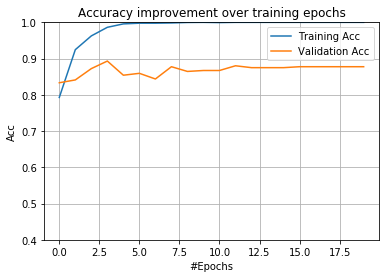

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


validation_errors = training_history.history["val_accuracy"]
training_errors   = training_history.history["accuracy"]

plt.title("Accuracy improvement over training epochs")
plt.plot(training_errors, label="Training Acc")
plt.plot(validation_errors, label = "Validation Acc" )
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, 1)
plt.legend()
plt.show()

In [5]:
import pickle

In [11]:
HISTORY_PATH

'./histories/'

In [16]:
strftime("%H%M%S_%Y%m%d", gmtime())

'102847_20200314'

In [26]:
training_history.model.pr

In [27]:
pd.DataFrame(training_history.history).to_csv(HISTORY_PATH \
        + "training_history_%s"\
        %(strftime("%H%M%S_%Y%m%d", gmtime())))

In [18]:
with open(HISTORY_PATH \
        + "training_history_%s"\
        %(strftime("%H%M%S_%Y%m%d", gmtime())), "wb")\
as f:
    pickle.dump(obj=training_history, file=f)

TypeError: can't pickle _thread.RLock objects

In [9]:
training_history

In [8]:
from time import gmtime, strftime

strftime("%H%M%S_%Y%m%d", gmtime())

'102354_20200314'

In [6]:
print(training_history.history)

{'val_loss': [0.5821441728746396, 0.5494509581900345, 0.5276355892619295, 0.5194235832656084, 0.5141240493999109, 0.5379772003555553, 0.5696049698864121, 0.5751632916400711, 0.6421923654944383, 0.7236489731783529], 'val_acc': [0.680053556061174, 0.7014725620009334, 0.7282463263475911, 0.736278439541578, 0.7550200830342141, 0.7630522004571785, 0.7630522081172131, 0.7657295911506796, 0.7282463186875564, 0.7402945022027655], 'loss': [0.6418126856597086, 0.5484520900341165, 0.5103917119246306, 0.47617404456123463, 0.44523060863441777, 0.40573940159405103, 0.37078165107099453, 0.3337985585712904, 0.2678994527380914, 0.23231941718428137], 'acc': [0.6273198458507017, 0.7242935966377054, 0.7435211499505489, 0.7689349606092549, 0.7898344754813965, 0.8182578167973543, 0.8393245275713014, 0.8552081590710506, 0.8941648552756987, 0.9048654067039968]}


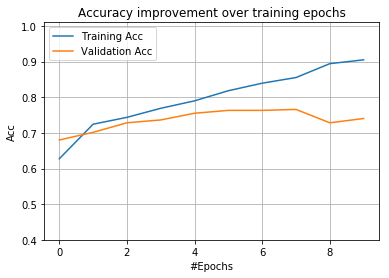

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


validation_errors = training_history.history["val_acc"]
training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")
plt.plot(training_errors, label="Training Acc")
plt.plot(validation_errors, label = "Validation Acc" )
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
plt.legend()
plt.show()

In [ ]:
def binarize_labels(gold_labels):
    return to_categorical(gold_labels)

In [ ]:
def remove_vague_tweets(tweets, gold_labels):
    '''
        Remove tweets with labels in (-1, 1):
    '''
    clear_indexes = np.logical_or(gold_labels <= -1\
                                  , gold_labels >= 1)
    
    return tweets[clear_indexes], gold_labels[clear_indexes]

In [7]:
np.logical_or(gold_labels <= -1, gold_labels >= 1)

array([ True,  True, False, ...,  True, False,  True])

In [5]:
def train_dev_test_split(vectorized_tweets, gold_labels\
                         , DEV_SPLIT  = .1\
                         , TEST_SPLIT = .1\
                         , R_SEED     = 7):
    
    #Shuffle indicies:
    data_dim = vectorized_tweets.shape[0] 
    indices  = np.arange(data_dim)
    np.random.shuffle(indices)
    
    #Shuffle data accordingly:
    vectorized_tweets = vectorized_tweets[indices]
    gold_labels       = gold_labels[indices]
    
    #Compute number of Dev & Test samples:
    num_dev_samples  = int(DEV_SPLIT  * data_dim)
    num_test_samples = int(TEST_SPLIT * data_dim)
    
    #Split data according to the above proportions:
    x_train = vectorized_tweets[:-(num_dev_samples+num_test_samples)] 
    y_train = gold_labels[:-(num_dev_samples+num_test_samples)]

    x_dev   = vectorized_tweets[-(num_dev_samples+num_test_samples)\
                                :-num_test_samples] 
    y_dev   = gold_labels[-(num_dev_samples+num_test_samples)\
                                :-num_test_samples] 

    x_test  = vectorized_tweets[-num_test_samples:] 
    y_test  = gold_labels[-num_test_samples:]
    
    return x_train, y_train, x_dev, y_dev, x_test, y_test


x_train, y_train, x_dev, y_dev, x_test, y_test = train_dev_test_split(\
                                                vectorized_tweets\
                                                , gold_labels)

In [6]:
x_train.shape, y_train.shape, x_dev.shape, y_dev.shape\
, x_test.shape, y_test.shape

((5981, 35), (5981,), (747, 35), (747,), (747, 35), (747,))

In [ ]:
# split the data into a training set and a dev set

DEV_SPLIT = .1

indices = np.arange(data_sequences.shape[0])
np.random.seed(7)#Irina 1, Stef 7
np.random.shuffle(indices)
data_sequences_shuff     = data_sequences[indices]
gold_labels_binary = np.where(gold_labels<=0, 0, 1)
gold_labels_binary = gold_labels_binary[indices]
gold_labels_binary = to_categorical(np.asarray(gold_labels_binary))


num_dev_samples = int(DEV_SPLIT \
                             * data_sequences_shuff.shape[0])

x_train_seq = data_sequences_shuff[:2*-num_dev_samples] 
y_train     = gold_labels_binary[:2*-num_dev_samples]

x_dev_seq   = data_sequences_shuff[2*-num_dev_samples:-num_dev_samples] 
y_dev       = gold_labels_binary[2*-num_dev_samples:-num_dev_samples]

x_test_seq  = data_sequences_shuff[-num_dev_samples:] 
y_test      = gold_labels_binary[-num_dev_samples:]

print(y_train.shape, y_dev.shape, y_test.shape\
      , y_train.shape[0] + y_dev.shape[0] + y_test.shape[0])


In [ ]:
def KFold_split(data_sequences, data_hot_sequences, gold_labels,\
               num_folds=3, random_seed=7):
    '''
        KFold split for our data format:

        input:  data_sequences, data_hot_sequences, gold_labels,
                num_folds=3
        output: tuple list of
                (data_sequences, data_hot_sequences, gold_labels)
                of length num_folds

    '''
    #Manual K folds split in 2 steps (shuffle & split):

    # from sklearn.model_selection import StratifiedKFold, KFold

    #1. Shuffle the data:
    indices = np.arange(data_sequences.shape[0])
    np.random.seed(random_seed)

    np.random.shuffle(indices)
    data_sequences     = data_sequences[indices]
    data_hot_sequences = data_hot_sequences[indices]
    gold_labels        = gold_labels[indices]

    #2. Split the data:

    #compute indexes for fair splits:
    fold_dim  = len(indices) // num_folds + 1
    folds_indexes = [(i*fold_dim, (i+1)*fold_dim) \
                     for i in range(num_folds)]

    #create the splits according to the indexes:
    folds = []
    for l, r in folds_indexes:
        fold = (data_sequences[l:r], data_hot_sequences[l:r]\
                , gold_labels[l:r])
        folds.append(fold)

    return folds

#Call that can be tested:
#KFold_split(*vectorize_data(*read_WCE_data(data_path)))[-2][1][2][-3:]
#array([   0, 2721,  433], dtype=int32)


# Data analysis

In [1]:
import matplotlib.pyplot as plt
import numpy             as np 
import pandas            as pd

Reading datasets:

In [2]:
#SST:
# pd.read_csv("data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"\
#            , error_bad_lines=False).head()
#TSA:
# pd.read_table("data/stanfordSentimentTreebank/stanfordSentimentTreebank/datasetSentences.txt"\
#              ).head()

#OPT:
tweets_df = pd.read_csv("data/optimism-twitter-data/tweets_annotation.csv")

print("There are %d tweets in the dataset." %tweets_df.shape[0])
tweets_df.head()


There are 7475 tweets in the dataset.


,Tweet,Username,AverageAnnotation
0,did i just hear clive anderson say peter cooke...,The_Bounder,1.0
1,anyways that's my evening thesis. write don't ...,Satori_Paris,1.0
2,when teachers ask why im late. (vine by @jimmy...,Sizzurp_713,-0.8
3,@obafemiwilliams @darren_linzoid @kenboy4 hurr...,NathElCuchillo,0.0
4,@karsten_frank @wjelger on the other hand. the...,Aethien,1.0


In [1]:
import pandas as pd

data_path   = "data/optimism-twitter-data/"
train_file  = "tweets_annotation.csv"
# MAX_SEQUENCE_LENGTH     = 0
# MAX_HOT_SEQUENCE_LENGTH = 0

def read_WCE_data(data_path, train=True):
    """
        Read data format given at the Word Complexity Estimation
        task, Deep Learning course, FMI UniBuc 2020.
        
        input:  folder containing given data file;
        output: texts, hot_words, gold_labels
    """
    original_df = pd.read_csv(data_path + train_file)
    
    print('Processing text dataset:')

    texts         = list(original_df['Tweet']) # list of text samples
    print('Found %s texts.\n' % len(texts))
    
    if train:
        gold_labels   = list(original_df['AverageAnnotation']) #list of gold labels
        return texts, gold_labels#, original_df
    
    return texts

tweets, gold_labels = read_WCE_data(data_path)#[2][:5]

Processing text dataset:
Found 7475 texts.



# TODO: Cleanup process

In [4]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text     import Tokenizer
from keras.utils                  import to_categorical
import numpy as np

/home/stefan/anaconda3/envs/cwi/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
print("The longest tweet has %d words." \
      %max([len(t.split(" ")) for t in tweets]))

The longest tweet has 34 words.


In [2]:
import numpy as np
from keras.preprocessing.text     import Tokenizer
from keras.preprocessing.sequence import pad_sequences


class CustomTokenizer:
    def __init__(self, MAX_SEQUENCE_LENGTH=40):
        self.MAX_SEQUENCE_LENGTH     = MAX_SEQUENCE_LENGTH
        self.tokenizer = Tokenizer()
        print("Tokenizer created!")
#         print("TTT %s" %ana)
        
    def fit_on_texts(self, texts):
#         self.MAX_SEQUENCE_LENGTH = 1 + max(map(lambda x: \
#                                                len(x.split(" "))\
#                                            , texts))
    
        self.tokenizer.fit_on_texts(texts)
        
    def texts_to_sequences(self, texts):
        return self.tokenizer.texts_to_sequences(texts)
    
    def get_word_index(self):
        return self.tokenizer.word_index
    
    def pad_sequences(self, sequences, maxlen):
        return pad_sequences(sequences, maxlen=maxlen)
    
    
custom_tokenizer = CustomTokenizer()#2, 3)
custom_tokenizer.fit_on_texts(tweets)
custom_tokenizer.get_word_index()["are"]

/home/stefan/anaconda3/envs/nlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Tokenizer created!


27

In [7]:
def vectorize_data(texts, gold_labels\
                   , custom_tokenizer\
                  , MAX_SEQUENCE_LENGTH=None):
    """
        Given a list of texts, a list of subsequences and 
        a list of labels for each of the texts, vectorie them.
        
        input:  texts, hot_words, gold_labels
        output: data_sequences, data_hot_sequences, gold_labels
    """
    
    print("Vectorizing given data...")
    if not(MAX_SEQUENCE_LENGTH):
        MAX_SEQUENCE_LENGTH = max(map(lambda x: len(x.split(" ")), texts)) + 1
    custom_tokenizer.MAX_SEQUENCE_LENGTH = MAX_SEQUENCE_LENGTH
    
    print("The longest phrase has %d words." \
          %(MAX_SEQUENCE_LENGTH - 1))

    # finally, vectorize the text samples into a 2D integer tensor

    sequences      = custom_tokenizer.texts_to_sequences(texts)
    data_sequences = custom_tokenizer.pad_sequences(sequences\
                                       , maxlen=MAX_SEQUENCE_LENGTH)
    
    gold_labels = (np.asarray(gold_labels))
    print('Shape of data_sequences tensor:', data_sequences.shape)
    print('Shape of label tensor: %s.\n' %str(gold_labels.shape))
                                  
    return data_sequences, gold_labels
                                  
# vectorize_data(*read_WCE_data(data_path))[-1][:6]
                                                        
data_sequences, gold_labels = vectorize_data(tweets, gold_labels\
                   , custom_tokenizer)

Vectorizing given data...
The longest phrase has 34 words.
Shape of data_sequences tensor: (7475, 35)
Shape of label tensor: (7475,).



# Train Test Val split

In [8]:
# split the data into a training set and a dev set

DEV_SPLIT = .1

indices = np.arange(data_sequences.shape[0])
np.random.seed(7)#Irina 1, Stef 7
np.random.shuffle(indices)
data_sequences_shuff     = data_sequences[indices]
gold_labels_binary = np.where(gold_labels<=0, 0, 1)
gold_labels_binary = gold_labels_binary[indices]
gold_labels_binary = to_categorical(np.asarray(gold_labels_binary))


num_dev_samples = int(DEV_SPLIT \
                             * data_sequences_shuff.shape[0])

x_train_seq = data_sequences_shuff[:2*-num_dev_samples] 
y_train     = gold_labels_binary[:2*-num_dev_samples]

x_dev_seq   = data_sequences_shuff[2*-num_dev_samples:-num_dev_samples] 
y_dev       = gold_labels_binary[2*-num_dev_samples:-num_dev_samples]

x_test_seq  = data_sequences_shuff[-num_dev_samples:] 
y_test      = gold_labels_binary[-num_dev_samples:]

print(y_train.shape, y_dev.shape, y_test.shape\
      , y_train.shape[0] + y_dev.shape[0] + y_test.shape[0])


(5981, 2) (747, 2) (747, 2) 7475


# Embeddings:

In [9]:
import numpy as np
import os

class Embedder:
    def __init__(self, path_to_emb, emb_size=25,\
                ):
        print('Indexing word vectors.')
        
        self.path_to_emb = path_to_emb
        self.embeddings_size  = emb_size
        
        if self.path_to_emb == False: 
            print("Using One-Hot-Encode embedding.")
            return
        
        self.embeddings_index = {}
#         "glove.twitter.27B"
#         'glove.6B.%dd.txt'
        with open(os.path.join(path_to_emb\
                               , "glove.twitter.27B.%dd.txt") \
                  %self.embeddings_size) as f:
            for line in f:
                word, coefs = line.split(maxsplit=1)
                coefs = np.fromstring(coefs, 'f', sep=' ')
                self.embeddings_index[word] = coefs

        print('Found %s word vectors.' % len(self.embeddings_index))

    
    
embedder = Embedder(False)#'./glove.6B/')
# embedder = Embedder(path_to_emb='./embeddings/glove.6B/',\
#                    emb_size=300)
embedder = Embedder(path_to_emb='./embeddings/glove.twitter.27B/',\
                   emb_size=200)
len(custom_tokenizer.get_word_index())

'./embeddings/glove.twitter.27B/glove.twitter.27B.%dd.txt'

Indexing word vectors.
Using One-Hot-Encode embedding.
Indexing word vectors.
Found 1193514 word vectors.


16168

In [10]:
from keras.initializers import Constant
from keras.layers import Embedding

def build_embedding_layers(embedder, custom_tokenizer\
                          , trainable=True):
    '''
        We neeed the word_index, 
    '''
    EMBEDDING_DIM = embedder.embeddings_size
    word_index    = custom_tokenizer.get_word_index()
    num_words     = len(word_index) + 1
    # prepare embedding matrix
    embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
    MAX_SEQUENCE_LENGTH     = custom_tokenizer.MAX_SEQUENCE_LENGTH
    
    #If No pretrained embeddings were provided: 
    if embedder.path_to_emb == False:
        embedding_layer = Embedding(num_words, EMBEDDING_DIM,
                 input_length=MAX_SEQUENCE_LENGTH, trainable=trainable)
        return embedding_layer
        
    #If GloVe embeddings were provided:
    for word, i in word_index.items():
        if i >= num_words:
            continue
        embedding_vector = embedder.embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    # load pre-trained word embeddings into an Embedding layer
    # note that we set trainable = False so as to keep the embeddings fixed
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=trainable)
    
    
    print('Embedding layer prepared.')  
    
    return embedding_layer

embedding_layer = build_embedding_layers(embedder, custom_tokenizer,\
                                        trainable=True)
embedding_layer.input_length

Embedding layer prepared.


35

# Architecture

In [11]:
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, GRU#, GlobalMaxPooling1D
from keras.layers import Input, Concatenate, Flatten, Dropout#, Embedding
from keras.models import Model
# from keras.initializers import Constant

In [12]:
def build_model(embedding_layer):
    print('1. Convs & Recurrences.')

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(embedding_layer.input_length, )\
                           , dtype='int32')

    embedded_sequences = embedding_layer(sequence_input)
#     x = Conv1D(256, 3, activation='relu')(embedded_sequences)
#     x = MaxPooling1D(3)(x)
#     x = Conv1D(128, 5, activation='relu')(x)
#     x = MaxPooling1D(5)(x)
    
    x = GRU(256, return_sequences=True)(embedded_sequences)
    x = GRU(128)(x)
    
#     x = Conv1D(64, 3, activation='relu')(x)
#     x = MaxPooling1D(3)(x)
    
#     x = LSTM(256)(x)

    tweet_branch = x
    dense_branch = tweet_branch

    
    print('2. Dense layers.')

#     dense_branch = Concatenate()([hot_branch, phrase_branch])#.shape
#     dense_branch = Flatten()(tweet_branch)
    
#     dense_branch = Dense(512, activation='relu')(dense_branch)
#     dense_branch = Dropout(rate = .5)(dense_branch)

    dense_branch = Dense(300, activation='relu')(dense_branch)
    dense_branch = Dropout(rate = .2)(dense_branch)

    dense_branch = Dense(200, activation='relu')(dense_branch)
    dense_branch = Dense(100, activation='relu')(dense_branch)
    dense_branch = Dropout(rate = .1)(dense_branch)

    preds = Dense(2, activation='softmax')(dense_branch)
    
    model = Model([sequence_input], preds)
    
    return model

model = build_model(embedding_layer)

1. Convs & Recurrences.
2. Dense layers.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 35)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 35, 200)           3233800   
_________________________________________________________________
gru_1 (GRU)                  (None, 35, 256)           350976    
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               147840    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               38700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
__________

# Training

In [24]:
from copy import deepcopy as copy
def train_model(model, folds, epochs=100, batch_size=2048):
    
    model.save('./models/untrained_model.h5')
    
    model.compile(loss='binary_crossentropy', #"mean_squared_logarithmic_error", #'binary_crossentropy',
              optimizer='adam',#'adam',#'rmsprop',
              metrics=['accuracy'])
    
    if len(folds) == 1:
        print("Training final model:")
        training_history = model.fit(#[x_train_seq, x_train_hot], y_train,
                            [folds[0][0]],\
                            folds[0][1],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=([x_dev_seq], y_dev))
            #validation_data=([x_val_seq, x_val_hot], y_val))

#         histories.append(training_history)
#         models.append(copy(model))
        model.save("./models/full_model.h5")
        return training_history, model
    
    
    
#     print("%d-Fold Cross Validation:" %len(folds))
        
#     histories = []
#     models    = []
    
#     for i, f in enumerate(folds):
        
#         print("\nFold %d/%d." %(i+1, len(folds)))
#         x_train_seq = np.vstack(list(map(lambda f: f[0]\
#                                          , folds[:i] + folds[i+1:])))
#         x_train_hot = np.vstack(list(map(lambda f: f[1]\
#                                          , folds[:i] + folds[i+1:])))
#         y_train     = np.hstack(list(map(lambda f: f[2]\
#                                          , folds[:i] + folds[i+1:]))) 
        
#         x_val_seq, x_val_hot, y_val = f
        

#         training_history = model.fit(#[x_train_seq, x_train_hot], y_train,
#                     [x_train_seq, x_train_hot],\
#                     y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     validation_data=([x_val_seq, x_val_hot], y_val))

#         histories.append(training_history)
#         models.append(copy(model))
#         model.save("./models/model_fold_%d.h5" %i)
#         model.load_weights("models/untrained_model.h5")
        
#     return histories, models


# training_history, model = train_model(model, [[x_train_seq, y_train]]\
#                                , epochs=30)

# Accuracy on dev

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


validation_errors = training_history.history["val_acc"]
training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")
plt.plot(training_errors, label="Training Acc")
plt.plot(validation_errors, label = "Validation Acc" )
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

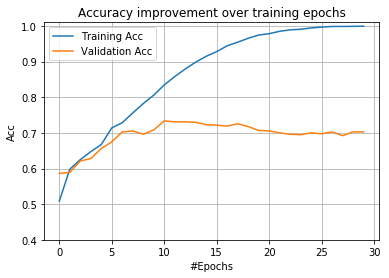

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


validation_errors = training_history.history["val_acc"]
training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")
plt.plot(training_errors, label="Training Acc")
plt.plot(validation_errors, label = "Validation Acc" )
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, ymax = 1.01)
plt.legend()
plt.show()

# Sentiment vs Optimism:

In [16]:
np.random.seed(7)#Irina 1, Stef 7

tsa_df = pd.read_csv("data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"\
           , error_bad_lines=False)


tsa_df = tsa_df.sample(frac=.25)
tsa_df.head()

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


,ItemID,Sentiment,SentimentSource,SentimentText
1024087,1024103,0,Sentiment140,@maccast The 5.01 ep isn't on iTunes mobile yet.
76847,76860,1,Sentiment140,"@aplusk lol, Awesomely sweet dude!"
1417690,1417706,1,Sentiment140,had a rough day today. My violin teacher actua...
442309,442322,0,Sentiment140,@psalmist_one Okay I seriously didn't realise ...
1324250,1324266,0,Sentiment140,Why does Space Mountain always shut down when ...


In [17]:
print('Processing TSA text dataset:')

tsa_tweets         = list(tsa_df['SentimentText']) # list of text samples
print('Found %s texts.\n'  %(f'{len(tsa_tweets):,}'))

tsa_gold_labels   = list(tsa_df['Sentiment']) #list of gold labels


Processing TSA text dataset:
Found 394,653 texts.



In [18]:
custom_tsa_tokenizer = CustomTokenizer()
custom_tsa_tokenizer.fit_on_texts(tsa_tweets)
custom_tsa_tokenizer.get_word_index()["are"]

tsa_data_sequences, tsa_gold_labels = vectorize_data(tsa_tweets\
                                             , tsa_gold_labels\
                   , custom_tsa_tokenizer\
                    , MAX_SEQUENCE_LENGTH=35)

Tokenizer created!
Vectorizing given data...
The longest phrase has 34 words.
Shape of data_sequences tensor: (394653, 35)
Shape of label tensor: (394653,).



In [19]:
# indices = np.arange(tsa_data_sequences.shape[0])
np.random.seed(7)#Irina 1, Stef 7
# np.random.shuffle(indices)

x_train_seq = tsa_data_sequences
y_train     = to_categorical(np.asarray(tsa_gold_labels))#np.where(tsa_gold_labels<=0, 0, 1)

x_dev_seq   = data_sequences_shuff#[2*-num_dev_samples:-num_dev_samples] 
y_dev       = gold_labels_binary#[2*-num_dev_samples:-num_dev_samples]

x_test_seq  = data_sequences_shuff#[-num_dev_samples:] 
y_test      = gold_labels_binary#[-num_dev_samples:]


print(y_train.shape, y_dev.shape, y_test.shape\
      , y_train.shape[0] + y_dev.shape[0] + y_test.shape[0])

(394653, 2) (7475, 2) (7475, 2) 409603


In [20]:
embedder = Embedder(False)#'./glove.6B/')
# embedder = Embedder(path_to_emb='./embeddings/glove.6B/',\
#                    emb_size=300)
embedder = Embedder(path_to_emb='./embeddings/glove.twitter.27B/',\
                   emb_size=200)
len(custom_tokenizer.get_word_index())


Indexing word vectors.
Using One-Hot-Encode embedding.
Indexing word vectors.
Found 1193514 word vectors.


16168

In [21]:

tsa_embedding_layer = build_embedding_layers(embedder, custom_tsa_tokenizer,\
                                        trainable=True)
tsa_embedding_layer.input_length

Embedding layer prepared.


35

In [22]:
tsa_model = build_model(tsa_embedding_layer)

1. Convs & Recurrences.
2. Dense layers.


In [23]:
tsa_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 35)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 35, 200)           52971800  
_________________________________________________________________
gru_3 (GRU)                  (None, 35, 256)           350976    
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               147840    
_________________________________________________________________
dense_5 (Dense)              (None, 300)               38700     
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
__________

In [ ]:

training_tsa_history, tsa_model = train_model(tsa_model\
                                              , [[x_train_seq, y_train]]\
                               , epochs=30)

Training final model:
Train on 394653 samples, validate on 7475 samples
Epoch 1/30
 34816/394653 [=>............................] - ETA: 17:42 - loss: 0.6342 - acc: 0.6324

# Drafts

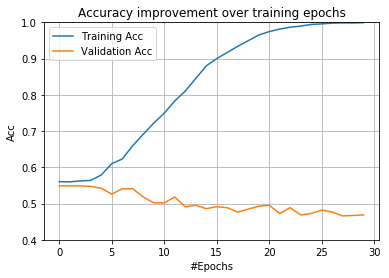

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline


validation_errors = training_history.history["val_acc"]
training_errors   = training_history.history["acc"]

plt.title("Accuracy improvement over training epochs")
plt.plot(training_errors, label="Training Acc")
plt.plot(validation_errors, label = "Validation Acc" )
plt.ylabel("Acc")
plt.xlabel("#Epochs")
plt.grid()
plt.ylim(0.4, 1)
plt.legend()
plt.show()

In [150]:
np.where(y_train>=0, y_train, 0).mean(), \
np.where(y_train>=0, 1, 0).sum(),   \
np.where(y_train<0, y_train, 0).mean(),  \
np.where(y_train<0, 1, 0).sum(), \
np.where(y_train>=0, 1, 0).sum() / y_train.shape[0]
# np.where(y_train>=0, 1, 0).sum() / 

(0.6084268714807086, 3765, -0.34307064964981704, 2216, 0.6294933957532185)

In [144]:
predictions = model.predict(x_dev_seq)
predictions

array([[1.00000000e+00],
       [1.26168627e-04],
       [6.14342561e-14],
       [2.66689040e-06],
       [3.72153908e-01],
       [9.96450424e-01],
       [9.98922110e-01],
       [2.89182931e-01],
       [6.35423756e-04],
       [2.89182931e-01],
       [9.59633484e-11],
       [1.00000000e+00],
       [7.72400411e-18],
       [3.56431782e-16],
       [1.30154717e-07],
       [2.01904757e-10],
       [9.99568880e-01],
       [1.29228420e-05],
       [1.53103663e-08],
       [2.89182931e-01],
       [1.69390063e-07],
       [8.84888649e-01],
       [1.00000000e+00],
       [9.93355155e-01],
       [1.64813559e-31],
       [1.00000000e+00],
       [9.47249879e-04],
       [6.54796930e-03],
       [2.89182931e-01],
       [1.00000000e+00],
       [2.89182931e-01],
       [9.81449604e-01],
       [2.89182931e-01],
       [1.11881241e-35],
       [5.24594099e-04],
       [2.29678470e-27],
       [4.11586883e-03],
       [1.20586023e-01],
       [2.89182931e-01],
       [2.89182931e-01],


In [135]:
np.where(predictions<=0, 0, 1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [62]:
tweets_df.groupby(by="Username").count().shape#.shape#["Tweet"]

(500, 2)

In [60]:
np.histogram(tweets_df.groupby(by="Username").count()["Tweet"].tolist()\
             , bins = range(1, 20))

(array([  0,   1,   0,   0,   1,   2,   0,   1,   0,   1,   3,   6,  25,
         79, 194, 187,   0,   0]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]))

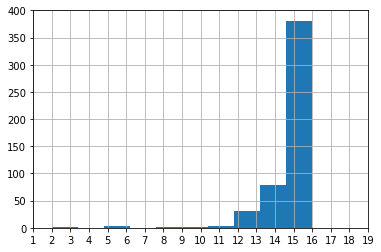

In [61]:
plt.hist(tweets_df.groupby(by="Username").count()["Tweet"].tolist())
plt.xticks(range(1, 20))
plt.grid()

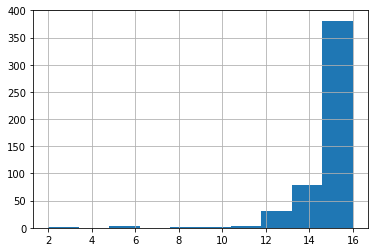

In [27]:
hist = tweets_df.groupby(by="Username").count()["Tweet"].hist()
plt.show()

In [33]:
hist.get_sketch_params()

In [17]:
pd.read_csv("data/optimism-twitter-data/user_information.csv"\
           ).head()

,Username,AverageAnnotation,ProfileInfo
0,threelilbirdsss,0.053333,['description: Mom. Wife. Career Lady. TV Junk...
1,caitlynsalalala,-0.142857,"[""description: Hi. I'm addicted to video games..."
2,Galafani1,0.014493,NaN
3,_takeachantz,-0.364865,"[""description: 412 | IUP'17 | Live Life | Don'..."
4,Sizzurp_713,-0.367647,"['description: knowledge Is Power.\n', 'follow..."


In [20]:
pd.read_csv("data/optimism-twitter-data/user_information.csv"\
           ).iloc[332]["ProfileInfo"]

"['description: Dad of 2. WATP Glasgow\\n', 'followers: 323\\n', 'following: 315\\n', 'total tweet number: 257\\n', 'created_at: Mon Sep 16 13:58:10 +0000 2013\\n', 'favorites_count: 741\\n', 'listed_count: 2\\n']"

# Drafts:

In [53]:
pd.read_csv("data/Sentiment-Analysis-Dataset/Sentiment Analysis Dataset.csv"\
           , error_bad_lines=False).groupby("Sentiment").count()

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


,ItemID,SentimentSource,SentimentText
Sentiment,,,
0,788435,788435,788435
1,790177,790177,790177


In [8]:
pd.read_table("data/stanfordSentimentTreebank/stanfordSentimentTreebank/datasetSentences.txt"\
             ).head()
#            , error_bad_lines=False).head()

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."
